# CAPSTONE II 
# HOUSING PRICES IN KING COUNTY,WA
# Insights

# Part I: Descriptive Statistics

# Step 1.1: Import Libraries 

In [1]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20,5)
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
# Import the data source to create a data frame 
df = pd.read_csv('C:/Users/zebun/Desktop/kc_house_data.csv')
zc= pd.read_csv('C:/Users/zebun/Desktop/SPRINGBOARD/CapstoneII_Zipcode .csv')

In [3]:
# Run data frame to make sure the df is refelcting the correct data retreived from database 
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Step 1.2: Data Cleansing

In [4]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


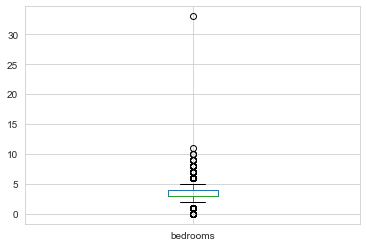

In [5]:
df['bedrooms'].plot(kind='box')

In [6]:
flt=df['bedrooms']>8
flt_=~flt
df=df[flt_]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
df[df['bedrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [8]:
df[~(df['bedrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
df[(df['bathrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [10]:
df[~(df['bathrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
df.quantile()
Q1= df.quantile(q=0.25,axis=0, numeric_only=True, interpolation='linear')
Q3= df.quantile(q=0.75,axis=0, numeric_only=True, interpolation='linear')

In [12]:
Q1

id               2.123049e+09
price            3.215000e+05
bedrooms         3.000000e+00
bathrooms        1.750000e+00
sqft_living      1.420500e+03
sqft_lot         5.040000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.190000e+03
sqft_basement    0.000000e+00
yr_built         1.951000e+03
yr_renovated     0.000000e+00
zipcode          9.803300e+04
lat              4.747080e+01
long            -1.223280e+02
sqft_living15    1.490000e+03
sqft_lot15       5.100000e+03
Name: 0.25, dtype: float64

In [13]:
Q3

id               7.308825e+09
price            6.450000e+05
bedrooms         4.000000e+00
bathrooms        2.500000e+00
sqft_living      2.550000e+03
sqft_lot         1.068875e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        4.000000e+00
grade            8.000000e+00
sqft_above       2.210000e+03
sqft_basement    5.600000e+02
yr_built         1.997000e+03
yr_renovated     0.000000e+00
zipcode          9.811800e+04
lat              4.767800e+01
long            -1.221250e+02
sqft_living15    2.360000e+03
sqft_lot15       1.008375e+04
Name: 0.75, dtype: float64

In [14]:
IQR=Q3-Q1
IQR

id               5.185776e+09
price            3.235000e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.129500e+03
sqft_lot         5.648750e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.072000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983750e+03
dtype: float64

In [15]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Lower_Limit

id              -5.655614e+09
price           -1.637500e+05
bedrooms         1.500000e+00
bathrooms        6.250000e-01
sqft_living     -2.737500e+02
sqft_lot        -3.433125e+03
floors          -5.000000e-01
waterfront       0.000000e+00
view             0.000000e+00
condition        1.500000e+00
grade            5.500000e+00
sqft_above      -3.400000e+02
sqft_basement   -8.400000e+02
yr_built         1.882000e+03
yr_renovated     0.000000e+00
zipcode          9.790550e+04
lat              4.716000e+01
long            -1.226325e+02
sqft_living15    1.850000e+02
sqft_lot15      -2.375625e+03
dtype: float64

In [16]:
Outliers = df [ ((df < Lower_Limit) | ((df > Upper_Limit))).any(axis=1) ]
Outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21593,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21598,8956200760,20141013T000000,541800.0,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814


In [17]:
no_outliers =df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
no_outliers 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
#no_outliers.drop('id','sqft_living','sqft_lot'axis=1).plot(kind='box')

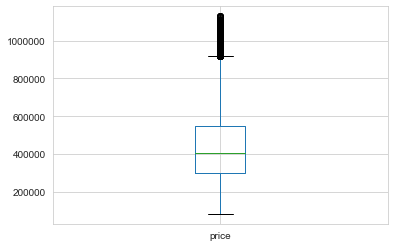

In [19]:
no_outliers['price'].plot(kind='box')

# Part II: Inferential Statitics 

# Step 2.1: Correlation with Sorted Values 

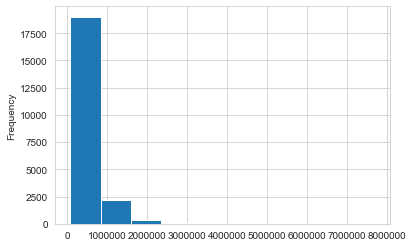

In [20]:
df['price'].plot(kind='hist')
plt.savefig('Price histo .png', dpi=600)

In [21]:
# Correlation test 
correlation=df.corr()
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.017090,0.002186,0.005513,-0.012278,-0.132141,0.018307,-0.002720,0.011772,-0.023803,0.007954,-0.010829,-0.005210,0.021880,-0.017124,-0.008287,-0.001997,0.020862,-0.003157,-0.138836
price,-0.017090,1.000000,0.316533,0.525581,0.702066,0.089771,0.256663,0.266490,0.397397,0.036541,0.667471,0.605623,0.323423,0.054544,0.126236,-0.053242,0.306890,0.021768,0.585360,0.082572
bedrooms,0.002186,0.316533,1.000000,0.528688,0.592938,0.033819,0.180245,-0.006407,0.082905,0.026695,0.370530,0.492626,0.308448,0.164431,0.017103,-0.159336,-0.012155,0.136891,0.406795,0.031533
bathrooms,0.005513,0.525581,0.528688,1.000000,0.754676,0.088162,0.500984,0.063982,0.188027,-0.124605,0.666436,0.685504,0.283088,0.507993,0.050152,-0.204797,0.024101,0.224073,0.569920,0.087667
sqft_living,-0.012278,0.702066,0.592938,0.754676,1.000000,0.173121,0.353614,0.103970,0.284791,-0.058435,0.763250,0.876610,0.434505,0.319177,0.055003,-0.199704,0.052200,0.240756,0.756951,0.183628
sqft_lot,-0.132141,0.089771,0.033819,0.088162,0.173121,1.000000,-0.005112,0.021595,0.074701,-0.008972,0.113648,0.183701,0.015438,0.052973,0.007742,-0.129553,-0.085630,0.229485,0.144627,0.718549
floors,0.018307,0.256663,0.180245,0.500984,0.353614,-0.005112,1.000000,0.023741,0.029688,-0.263681,0.458426,0.523716,-0.246401,0.490470,0.005996,-0.059377,0.049400,0.125788,0.280018,-0.011158
waterfront,-0.002720,0.266490,-0.006407,0.063982,0.103970,0.021595,0.023741,1.000000,0.401913,0.016654,0.082797,0.072153,0.080717,-0.026225,0.093015,0.030300,-0.014251,-0.041939,0.086476,0.030692
view,0.011772,0.397397,0.082905,0.188027,0.284791,0.074701,0.029688,0.401913,1.000000,0.046073,0.251286,0.167801,0.276941,-0.053800,0.104177,0.085055,0.006219,-0.078590,0.280390,0.072556
condition,-0.023803,0.036541,0.026695,-0.124605,-0.058435,-0.008972,-0.263681,0.016654,0.046073,1.000000,-0.144596,-0.158005,0.174472,-0.361786,-0.060414,0.003091,-0.014964,-0.106558,-0.092711,-0.003422


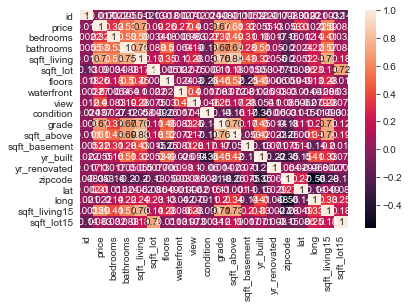

In [22]:
sns.heatmap(correlation,annot=True)

In [23]:
#Retreive the correlation on price and sort in descending order 
correlation['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702066
grade            0.667471
sqft_above       0.605623
sqft_living15    0.585360
bathrooms        0.525581
view             0.397397
sqft_basement    0.323423
bedrooms         0.316533
lat              0.306890
waterfront       0.266490
floors           0.256663
yr_renovated     0.126236
sqft_lot         0.089771
sqft_lot15       0.082572
yr_built         0.054544
condition        0.036541
long             0.021768
id              -0.017090
zipcode         -0.053242
Name: price, dtype: float64

In [24]:
#Drop insignificant values in the correlation test 
correlation['price'].drop(['id','zipcode','long','lat']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702066
grade            0.667471
sqft_above       0.605623
sqft_living15    0.585360
bathrooms        0.525581
view             0.397397
sqft_basement    0.323423
bedrooms         0.316533
waterfront       0.266490
floors           0.256663
yr_renovated     0.126236
sqft_lot         0.089771
sqft_lot15       0.082572
yr_built         0.054544
condition        0.036541
Name: price, dtype: float64

# Step 2.2: Plot the Correlation

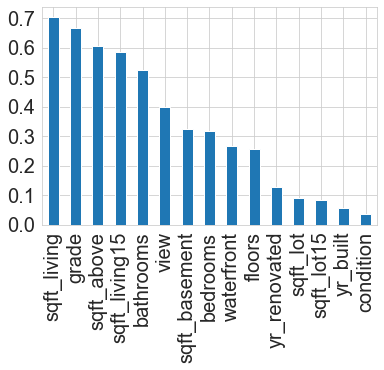

In [25]:
correlation['price'].drop(['price','id','zipcode','long','lat']).sort_values(ascending=False).plot(kind='bar',fontsize=20)
plt.savefig('Correlation.png', transparent=True, dpi=600, bbox_inches="tight")


# Step 2.3: Create values for Regression test

In [26]:
y=df['price']
x=df[['sqft_living','grade','sqft_living15','bathrooms','view','sqft_basement','bedrooms','waterfront','floors']]
x=sm.add_constant(x)
x

,const,sqft_living,grade,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront,floors
0,1.0,1180,7,1340,1.00,0,0,3,0,1.0
1,1.0,2570,7,1690,2.25,0,400,3,0,2.0
2,1.0,770,6,2720,1.00,0,0,2,0,1.0
3,1.0,1960,7,1360,3.00,0,910,4,0,1.0
4,1.0,1680,8,1800,2.00,0,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,8,1530,2.50,0,0,3,0,3.0
21609,1.0,2310,8,1830,2.50,0,0,4,0,2.0
21610,1.0,1020,7,1020,0.75,0,0,2,0,2.0
21611,1.0,1600,8,1410,2.50,0,0,3,0,2.0


# Step 2.4: Run the Regression test

In [27]:
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3549.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:03:50   Log-Likelihood:            -2.9764e+05
No. Observations:               21602   AIC:                         5.953e+05
Df Residuals:                   21592   BIC:                         5.954e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.839e+05   1.45e+04    -33.383      0.000   -5.12e+05   -4.55e+05
sqft_living     182.1192      4.130     44.096      0.000     174.024     190.214
grade          9.987e+04   2395.017     41.700      0.000    9.52e+04    1.05e+05
sqft_living15     6.2063      3.862      1.607      0.108      -1.364      13.777
bathrooms      -1.66e+04   3535.012     -4.696      0.000   -2.35e+04   -9672.086
view             6.1e+04   2426.957     25.135      0.000    5.62e+04    6.58e+04
sqft_basement    44.9455      4.827      9.311      0.000      35.484      54.407
bedrooms      -3.344e+04   2282.898    -14.649      0.000   -3.79e+04    -2.9e+04
waterfront     5.862e+05   2.01e+04     29.196      0.000    5.47e+05    6.26e+05
floors        -1.072e+04   3975.298     -2.696      0.007   -1.85e+04   -2924.626
==============================================================================
Omnibus:                    15503.739   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891928.299
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      33.953   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y=df['price']
x=df[['sqft_living','grade','bathrooms','view','sqft_basement','bedrooms','waterfront','floors']]
x=sm.add_constant(x)
x

,const,sqft_living,grade,bathrooms,view,sqft_basement,bedrooms,waterfront,floors
0,1.0,1180,7,1.00,0,0,3,0,1.0
1,1.0,2570,7,2.25,0,400,3,0,2.0
2,1.0,770,6,1.00,0,0,2,0,1.0
3,1.0,1960,7,3.00,0,910,4,0,1.0
4,1.0,1680,8,2.00,0,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,8,2.50,0,0,3,0,3.0
21609,1.0,2310,8,2.50,0,0,4,0,2.0
21610,1.0,1020,7,0.75,0,0,2,0,2.0
21611,1.0,1600,8,2.50,0,0,3,0,2.0


In [29]:
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3992.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:03:50   Log-Likelihood:            -2.9764e+05
No. Observations:               21602   AIC:                         5.953e+05
Df Residuals:                   21593   BIC:                         5.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.841e+05   1.45e+04    -33.396      0.000   -5.12e+05   -4.56e+05
sqft_living     185.0514      3.705     49.944      0.000     177.789     192.314
grade           1.01e+05   2293.473     44.030      0.000    9.65e+04    1.05e+05
bathrooms     -1.668e+04   3534.817     -4.718      0.000   -2.36e+04   -9749.517
view           6.148e+04   2408.650     25.525      0.000    5.68e+04    6.62e+04
sqft_basement    43.2926      4.716      9.179      0.000      34.048      52.537
bedrooms      -3.348e+04   2282.884    -14.664      0.000    -3.8e+04    -2.9e+04
waterfront     5.851e+05   2.01e+04     29.158      0.000    5.46e+05    6.24e+05
floors        -1.166e+04   3931.417     -2.967      0.003   -1.94e+04   -3958.697
==============================================================================
Omnibus:                    15437.830   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           875149.733
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      33.655   Cond. No.                     2.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 2.5: Plot the Regression 

In [30]:
predicted_y=regression_model.predict(x)

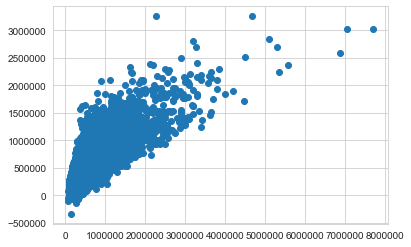

In [31]:
plt.scatter(y,predicted_y)

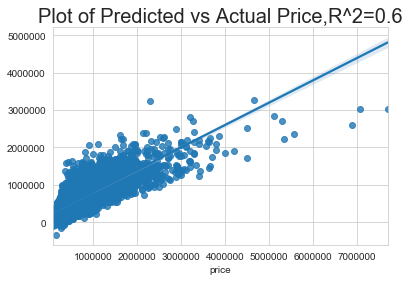

In [32]:
sns.regplot(x=y, y=predicted_y)
plt.title('Plot of Predicted vs Actual Price,R^2=0.6',fontsize=20)
plt.savefig('Price_reression.png', dpi=600)

# Step 3.1: Correlation of Log of Price 

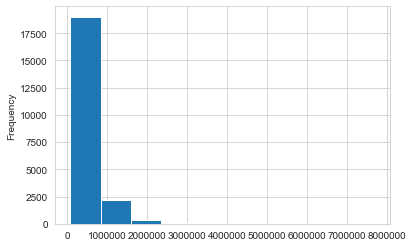

In [33]:
df['price'].plot(kind='hist')
plt.savefig('Price.png', dpi=600)

In [34]:
df['price_log']=np.log10(df['price'])

C:\Users\zebun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5.346157
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.730782
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,5.255273
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,5.781037
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.707570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5.556303
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,5.602060
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,5.604335
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,5.602060


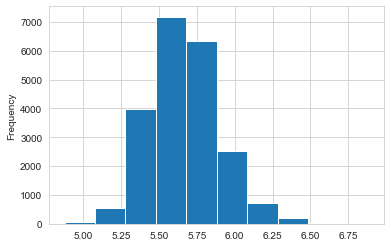

In [36]:
df['price_log'].plot(kind='hist')
plt.savefig('PriceLog.png', dpi=600)

In [37]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
id,1.000000,-0.017090,0.002186,0.005513,-0.012278,-0.132141,0.018307,-0.002720,0.011772,-0.023803,...,-0.010829,-0.005210,0.021880,-0.017124,-0.008287,-0.001997,0.020862,-0.003157,-0.138836,-0.004096
price,-0.017090,1.000000,0.316533,0.525581,0.702066,0.089771,0.256663,0.266490,0.397397,0.036541,...,0.605623,0.323423,0.054544,0.126236,-0.053242,0.306890,0.021768,0.585360,0.082572,0.891600
bedrooms,0.002186,0.316533,1.000000,0.528688,0.592938,0.033819,0.180245,-0.006407,0.082905,0.026695,...,0.492626,0.308448,0.164431,0.017103,-0.159336,-0.012155,0.136891,0.406795,0.031533,0.351910
bathrooms,0.005513,0.525581,0.528688,1.000000,0.754676,0.088162,0.500984,0.063982,0.188027,-0.124605,...,0.685504,0.283088,0.507993,0.050152,-0.204797,0.024101,0.224073,0.569920,0.087667,0.551190
sqft_living,-0.012278,0.702066,0.592938,0.754676,1.000000,0.173121,0.353614,0.103970,0.284791,-0.058435,...,0.876610,0.434505,0.319177,0.055003,-0.199704,0.052200,0.240756,0.756951,0.183628,0.695280
sqft_lot,-0.132141,0.089771,0.033819,0.088162,0.173121,1.000000,-0.005112,0.021595,0.074701,-0.008972,...,0.183701,0.015438,0.052973,0.007742,-0.129553,-0.085630,0.229485,0.144627,0.718549,0.099759
floors,0.018307,0.256663,0.180245,0.500984,0.353614,-0.005112,1.000000,0.023741,0.029688,-0.263681,...,0.523716,-0.246401,0.490470,0.005996,-0.059377,0.049400,0.125788,0.280018,-0.011158,0.310409
waterfront,-0.002720,0.266490,-0.006407,0.063982,0.103970,0.021595,0.023741,1.000000,0.401913,0.016654,...,0.072153,0.080717,-0.026225,0.093015,0.030300,-0.014251,-0.041939,0.086476,0.030692,0.174689
view,0.011772,0.397397,0.082905,0.188027,0.284791,0.074701,0.029688,0.401913,1.000000,0.046073,...,0.167801,0.276941,-0.053800,0.104177,0.085055,0.006219,-0.078590,0.280390,0.072556,0.346632
condition,-0.023803,0.036541,0.026695,-0.124605,-0.058435,-0.008972,-0.263681,0.016654,0.046073,1.000000,...,-0.158005,0.174472,-0.361786,-0.060414,0.003091,-0.014964,-0.106558,-0.092711,-0.003422,0.039705


In [38]:
correlation_priceLog=df.corr()
correlation_priceLog['price'].sort_values(ascending=False)

price            1.000000
price_log        0.891600
sqft_living      0.702066
grade            0.667471
sqft_above       0.605623
sqft_living15    0.585360
bathrooms        0.525581
view             0.397397
sqft_basement    0.323423
bedrooms         0.316533
lat              0.306890
waterfront       0.266490
floors           0.256663
yr_renovated     0.126236
sqft_lot         0.089771
sqft_lot15       0.082572
yr_built         0.054544
condition        0.036541
long             0.021768
id              -0.017090
zipcode         -0.053242
Name: price, dtype: float64

# Step 3.2: Plot Correlation of PriceLog 

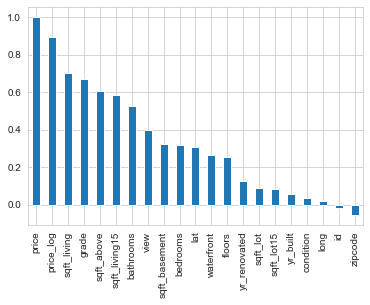

In [39]:
correlation_priceLog['price'].sort_values(ascending=False).plot(kind='bar')

# Step 3.3: Create Values for Regression Test of PriceLog

In [40]:
y=df['price_log']
x=df[['sqft_living','grade','sqft_living15','bathrooms','view','sqft_basement','bedrooms','waterfront','floors']]
x=sm.add_constant(x)
x

,const,sqft_living,grade,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront,floors
0,1.0,1180,7,1340,1.00,0,0,3,0,1.0
1,1.0,2570,7,1690,2.25,0,400,3,0,2.0
2,1.0,770,6,2720,1.00,0,0,2,0,1.0
3,1.0,1960,7,1360,3.00,0,910,4,0,1.0
4,1.0,1680,8,1800,2.00,0,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,8,1530,2.50,0,0,3,0,3.0
21609,1.0,2310,8,1830,2.50,0,0,4,0,2.0
21610,1.0,1020,7,1020,0.75,0,0,2,0,2.0
21611,1.0,1600,8,1410,2.50,0,0,3,0,2.0


# Step 3.4: Run Regression for PriceLog

In [41]:
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     3429.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:04:02   Log-Likelihood:                 10805.
No. Observations:               21602   AIC:                        -2.159e+04
Df Residuals:                   21592   BIC:                        -2.151e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8554      0.009    532.224      0.000       4.838       4.873
sqft_living    5.902e-05    2.6e-06     22.707      0.000    5.39e-05    6.41e-05
grade             0.0767      0.002     50.852      0.000       0.074       0.080
sqft_living15  3.679e-05   2.43e-06     15.132      0.000     3.2e-05    4.16e-05
bathrooms        -0.0084      0.002     -3.785      0.000      -0.013      -0.004
view              0.0289      0.002     18.905      0.000       0.026       0.032
sqft_basement  6.324e-05   3.04e-06     20.816      0.000    5.73e-05    6.92e-05
bedrooms         -0.0052      0.001     -3.612      0.000      -0.008      -0.002
waterfront        0.1571      0.013     12.429      0.000       0.132       0.182
floors            0.0249      0.003      9.968      0.000       0.020       0.030
==============================================================================
Omnibus:                        9.020   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.814
Skew:                           0.036   Prob(JB):                       0.0122
Kurtosis:                       2.931   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 3.5: Plot the Regression of PriceLog

In [42]:
predicted_y=regression_model.predict(x)

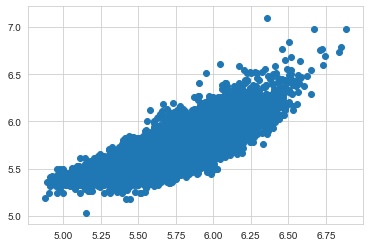

In [43]:
plt.scatter(y,predicted_y)

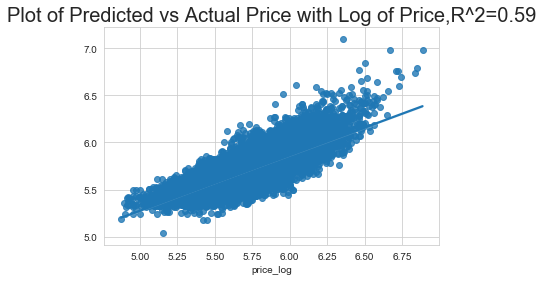

In [44]:
sns.regplot(y,predicted_y)
plt.title('Plot of Predicted vs Actual Price with Log of Price,R^2=0.59',fontsize=20)
plt.savefig('PriceLog_regression.png', dpi=600)

# PART III
# Step 4.1: Create Dummy Variables

In [45]:
zc

,Zip,Neigborhood
0,98001,Algona
1,98001,Auburn
2,98001,Federal Way
3,98002,Auburn
4,98003,Auburn
...,...,...
148,98198,Seattle
149,98199,Seattle
150,98224,Baring
151,98288,Skykomish


In [46]:
Zcode=zc['Zip']
Nhood=zc['Neigborhood']
Zip_code=dict(zip(Zcode,Nhood))

In [47]:
df['zipcode_copy']=df['zipcode']
df.replace({'zipcode':Zip_code},inplace=True)
df.rename(columns={'zipcode':'Neigborhood'},inplace=True)
df

C:\Users\zebun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zebun\anaconda3\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,
C:\Users\zebun\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,Neigborhood,lat,long,sqft_living15,sqft_lot15,price_log,zipcode_copy
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,Tukwila,47.5112,-122.257,1340,5650,5.346157,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,Seattle,47.7210,-122.319,1690,7639,5.730782,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,Bothell,47.7379,-122.233,2720,8062,5.255273,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,Seattle,47.5208,-122.393,1360,5000,5.781037,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,Redmond,47.6168,-122.045,1800,7503,5.707570,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,Seattle,47.6993,-122.346,1530,1509,5.556303,98103
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,Seattle,47.5107,-122.362,1830,7200,5.602060,98146
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,Seattle,47.5944,-122.299,1020,2007,5.604335,98144
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,Issaquah,47.5345,-122.069,1410,1287,5.602060,98027


In [48]:
df['zc_Nhood']=df['Neigborhood'].astype(str)+'_'+df['zipcode_copy'].astype(str)
df

C:\Users\zebun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,Neigborhood,lat,long,sqft_living15,sqft_lot15,price_log,zipcode_copy,zc_Nhood
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,Tukwila,47.5112,-122.257,1340,5650,5.346157,98178,Tukwila_98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,Seattle,47.7210,-122.319,1690,7639,5.730782,98125,Seattle_98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,Bothell,47.7379,-122.233,2720,8062,5.255273,98028,Bothell_98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,Seattle,47.5208,-122.393,1360,5000,5.781037,98136,Seattle_98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,Redmond,47.6168,-122.045,1800,7503,5.707570,98074,Redmond_98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,Seattle,47.6993,-122.346,1530,1509,5.556303,98103,Seattle_98103
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,Seattle,47.5107,-122.362,1830,7200,5.602060,98146,Seattle_98146
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,Seattle,47.5944,-122.299,1020,2007,5.604335,98144,Seattle_98144
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,Issaquah,47.5345,-122.069,1410,1287,5.602060,98027,Issaquah_98027


In [49]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'Neigborhood', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_log', 'zipcode_copy', 'zc_Nhood'],
      dtype='object')

In [50]:
x=df[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view','grade','sqft_basement','sqft_living15','zc_Nhood']]
x=sm.add_constant(x)
#y=df['price'] 
y=np.log10(df['price'])
x

,const,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,sqft_living15,zc_Nhood
0,1.0,3,1.00,1180,1.0,0,0,7,0,1340,Tukwila_98178
1,1.0,3,2.25,2570,2.0,0,0,7,400,1690,Seattle_98125
2,1.0,2,1.00,770,1.0,0,0,6,0,2720,Bothell_98028
3,1.0,4,3.00,1960,1.0,0,0,7,910,1360,Seattle_98136
4,1.0,3,2.00,1680,1.0,0,0,8,0,1800,Redmond_98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,3,2.50,1530,3.0,0,0,8,0,1530,Seattle_98103
21609,1.0,4,2.50,2310,2.0,0,0,8,0,1830,Seattle_98146
21610,1.0,2,0.75,1020,2.0,0,0,7,0,1020,Seattle_98144
21611,1.0,3,2.50,1600,2.0,0,0,8,0,1410,Issaquah_98027


In [51]:
x=pd.get_dummies(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21602 entries, 0 to 21612
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         21602 non-null  float64
 1   bedrooms                      21602 non-null  int64  
 2   bathrooms                     21602 non-null  float64
 3   sqft_living                   21602 non-null  int64  
 4   floors                        21602 non-null  float64
 5   waterfront                    21602 non-null  int64  
 6   view                          21602 non-null  int64  
 7   grade                         21602 non-null  int64  
 8   sqft_basement                 21602 non-null  int64  
 9   sqft_living15                 21602 non-null  int64  
 10  zc_Nhood_Auburn_98002         21602 non-null  uint8  
 11  zc_Nhood_Auburn_98092         21602 non-null  uint8  
 12  zc_Nhood_Bellevue_98005       21602 non-null  uint8  
 13  z

In [52]:
regression_model = sm.OLS(y, x).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1832.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:04:10   Log-Likelihood:                 23180.
No. Observations:               21602   AIC:                        -4.620e+04
Df Residuals:                   21523   BIC:                        -4.557e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.0498      0.006    917.676      0.000       5.039       5.061
bedrooms                         0.0026      0.001      3.093      0.002       0.001       0.004
bathrooms                        0.0140      0.001     10.980      0.000       0.012       0.017
sqft_living                   9.351e-05   1.51e-06     61.805      0.000    9.05e-05    9.65e-05
floors                          -0.0255      0.002    -16.802      0.000      -0.028      -0.023
waterfront                       0.2036      0.007     27.999      0.000       0.189       0.218
view                             0.0275      0.001     30.543      0.000       0.026       0.029
grade                            0.0369      0.001     41.249      0.000       0.035       0.039
sqft_basement                 -3.17e-05   1.86e-06    -17.062      0.000   -3.53e-05   -2.81e-05
sqft_living15                 3.483e-05   1.48e-06     23.513      0.000    3.19e-05    3.77e-05
zc_Nhood_Auburn_98002           -0.1397      0.006    -23.811      0.000      -0.151      -0.128
zc_Nhood_Auburn_98092           -0.1177      0.004    -26.600      0.000      -0.126      -0.109
zc_Nhood_Bellevue_98005          0.1899      0.006     29.663      0.000       0.177       0.202
zc_Nhood_Bellevue_98006          0.1396      0.004     36.342      0.000       0.132       0.147
zc_Nhood_Bellevue_98007          0.1526      0.007     22.003      0.000       0.139       0.166
zc_Nhood_Bellevue_98008          0.1495      0.005     30.311      0.000       0.140       0.159
zc_Nhood_Black Diamond_98010    -0.0090      0.008     -1.095      0.273      -0.025       0.007
zc_Nhood_Bothell_98011           0.0573      0.006      9.712      0.000       0.046       0.069
zc_Nhood_Bothell_98028           0.0465      0.005      9.468      0.000       0.037       0.056
zc_Nhood_Carnation_98014         0.0149      0.007      2.016      0.044       0.000       0.029
zc_Nhood_Duvall_98019            0.0122      0.006      2.044      0.041       0.001       0.024
zc_Nhood_Enumclaw_98022         -0.0914      0.005    -16.881      0.000      -0.102      -0.081
zc_Nhood_Fall City_98024         0.0696      0.009      7.626      0.000       0.052       0.087
zc_Nhood_Federal Way_98001      -0.1331      0.004    -30.595      0.000      -0.142      -0.125
zc_Nhood_Federal Way_98003      -0.1294      0.005    -26.213      0.000      -0.139      -0.120
zc_Nhood_Federal Way_98023      -0.1498      0.004    -40.196      0.000      -0.157      -0.142
zc_Nhood_Issaquah_98027          0.0915      0.004     22.264      0.000       0.083       0.100
zc_Nhood_Issaquah_98029          0.1226      0.005     26.293      0.000       0.113       0.132
zc_Nhood_Issaquah_98075          0.0997      0.005     22.105      0.000    

In [53]:
predicted_y=regression_model.predict(x)

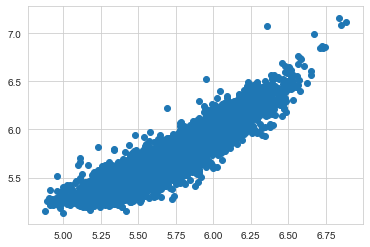

In [54]:
plt.scatter(y,predicted_y)

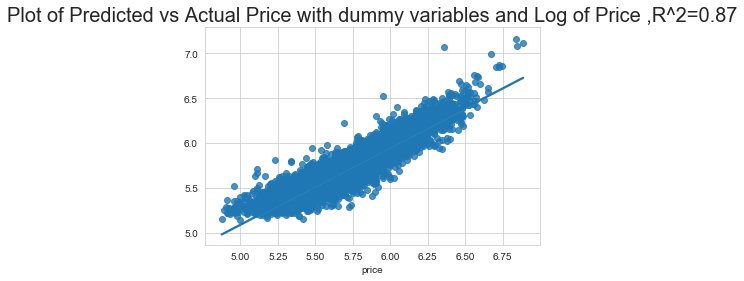

In [55]:
sns.regplot(x=y, y=predicted_y)
plt.title('Plot of Predicted vs Actual Price with dummy variables and Log of Price ,R^2=0.87',fontsize=20)
plt.savefig('Dummy_variables.png', dpi=600)

In [56]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,Neigborhood,lat,long,sqft_living15,sqft_lot15,price_log,zipcode_copy,zc_Nhood
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,Tukwila,47.5112,-122.257,1340,5650,5.346157,98178,Tukwila_98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,Seattle,47.7210,-122.319,1690,7639,5.730782,98125,Seattle_98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,Bothell,47.7379,-122.233,2720,8062,5.255273,98028,Bothell_98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,Seattle,47.5208,-122.393,1360,5000,5.781037,98136,Seattle_98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,Redmond,47.6168,-122.045,1800,7503,5.707570,98074,Redmond_98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,Seattle,47.6993,-122.346,1530,1509,5.556303,98103,Seattle_98103
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,Seattle,47.5107,-122.362,1830,7200,5.602060,98146,Seattle_98146
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,Seattle,47.5944,-122.299,1020,2007,5.604335,98144,Seattle_98144
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,Issaquah,47.5345,-122.069,1410,1287,5.602060,98027,Issaquah_98027


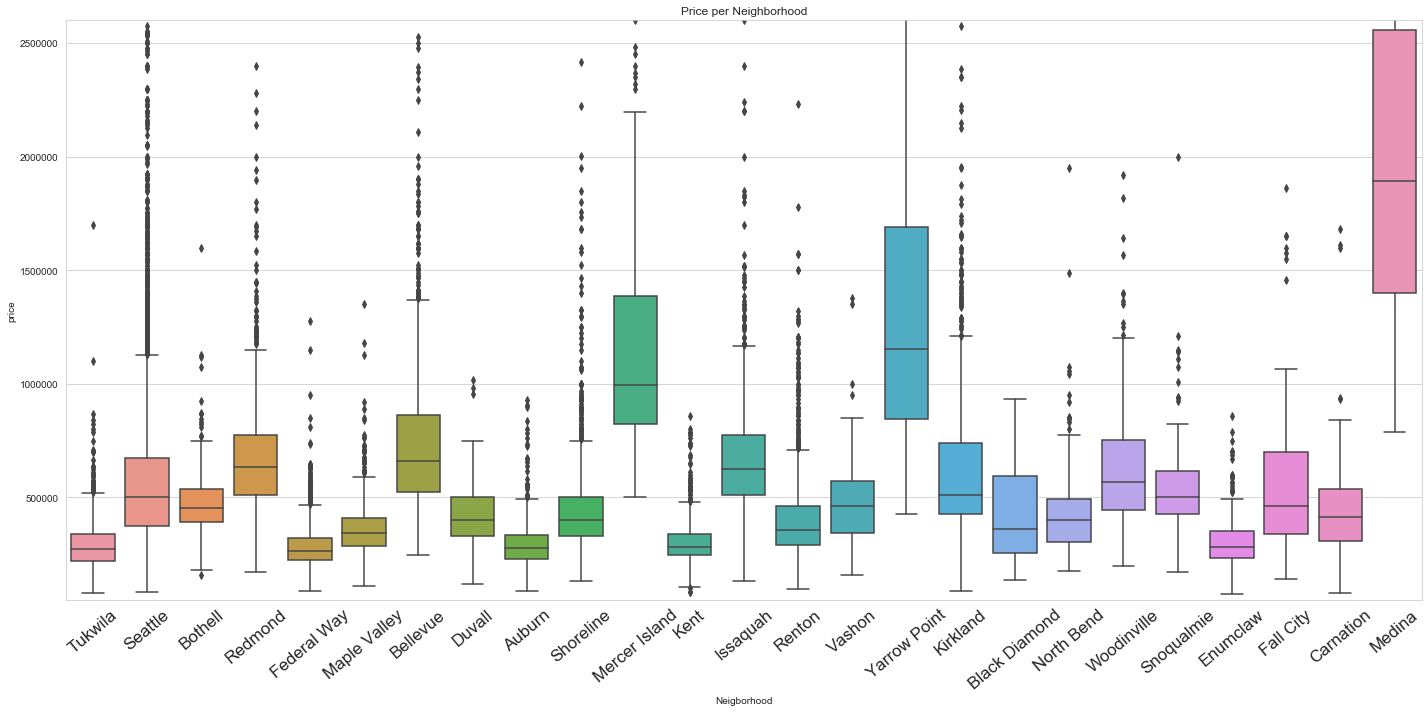

In [57]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(x='Neigborhood', y='price', data=df, orient="v")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 17, rotation = 40)
plt.ylim((50000,2600000))
plt.title('Price per Neighborhood')
plt.tight_layout()
#plt.show()
plt.savefig('Neighborhood_price.png', dpi=600)

In [58]:
unique_Nhood=df.Neigborhood.unique()
unique_Nhood

array(['Tukwila', 'Seattle', 'Bothell', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Shoreline',
       'Mercer Island', 'Kent', 'Issaquah', 'Renton', 'Vashon',
       'Yarrow Point', 'Kirkland', 'Black Diamond', 'North Bend',
       'Woodinville', 'Snoqualmie', 'Enumclaw', 'Fall City', 'Carnation',
       'Medina'], dtype=object)

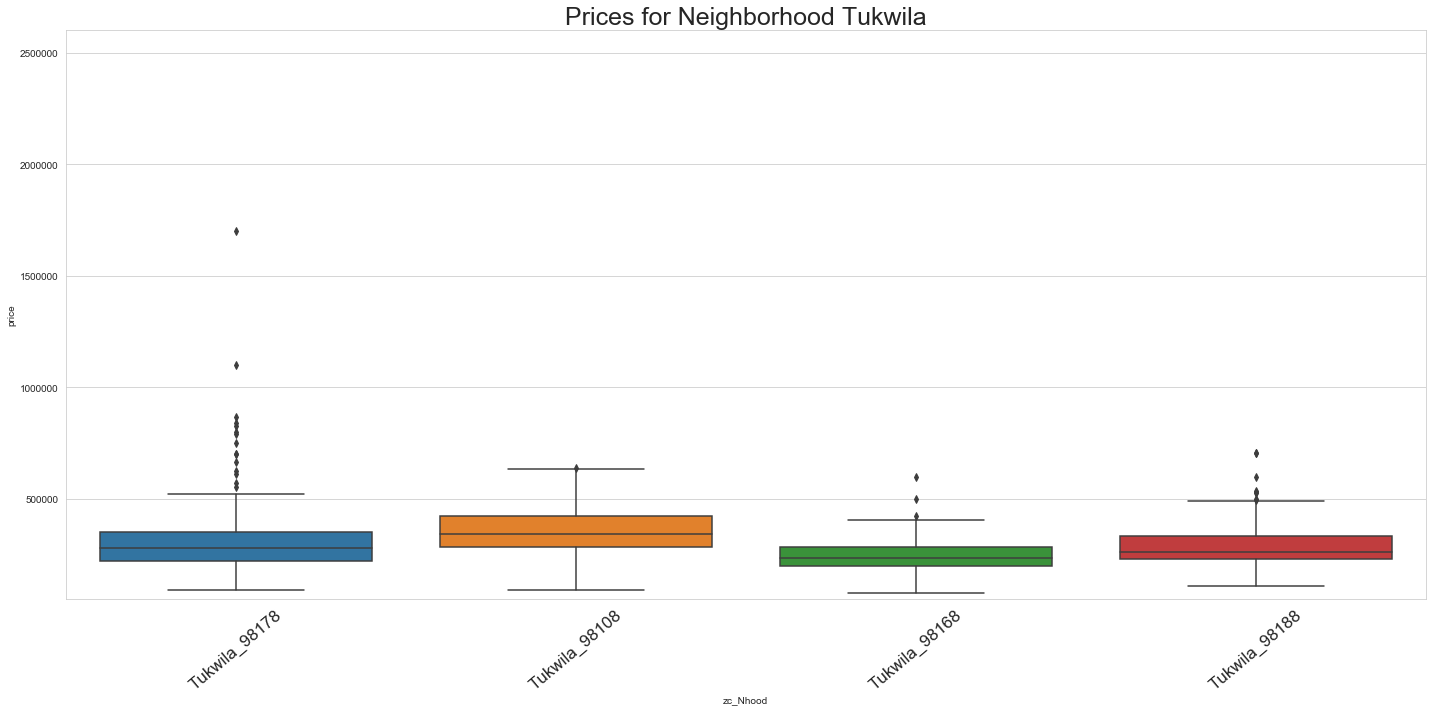

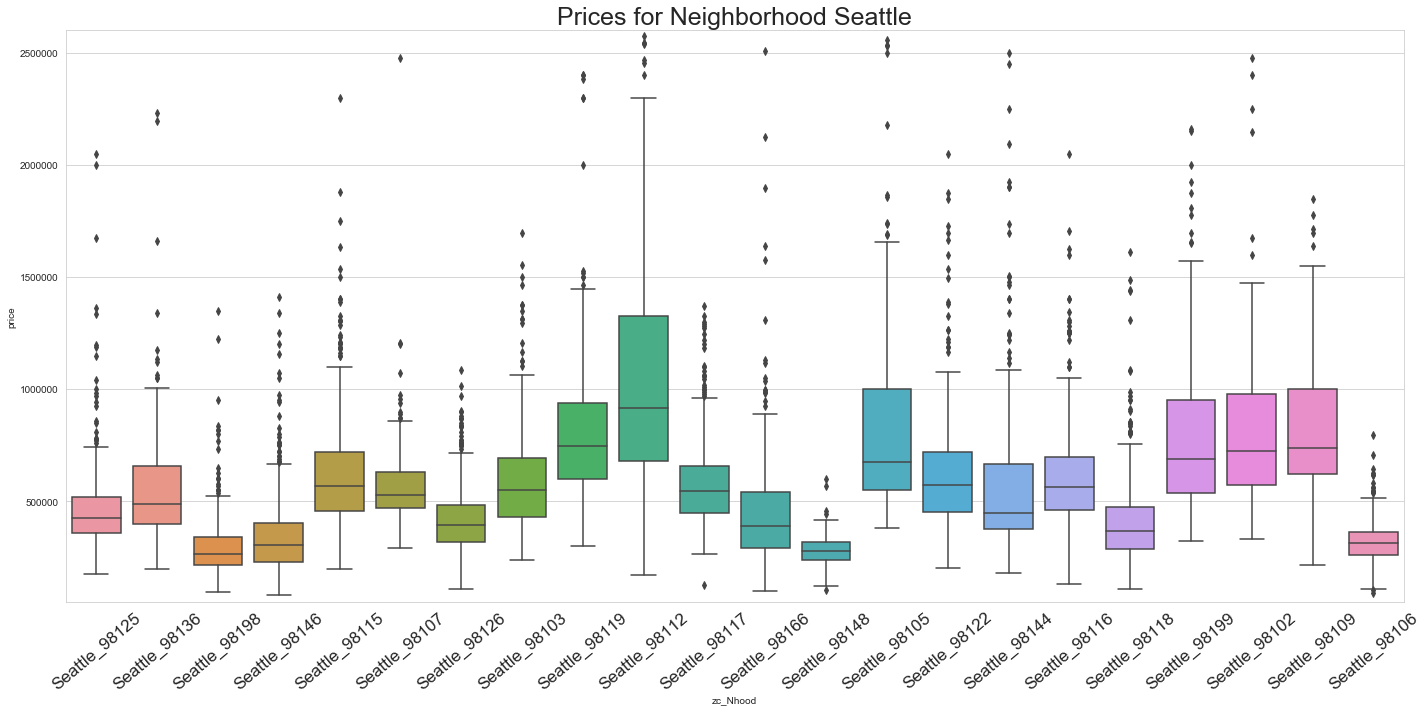

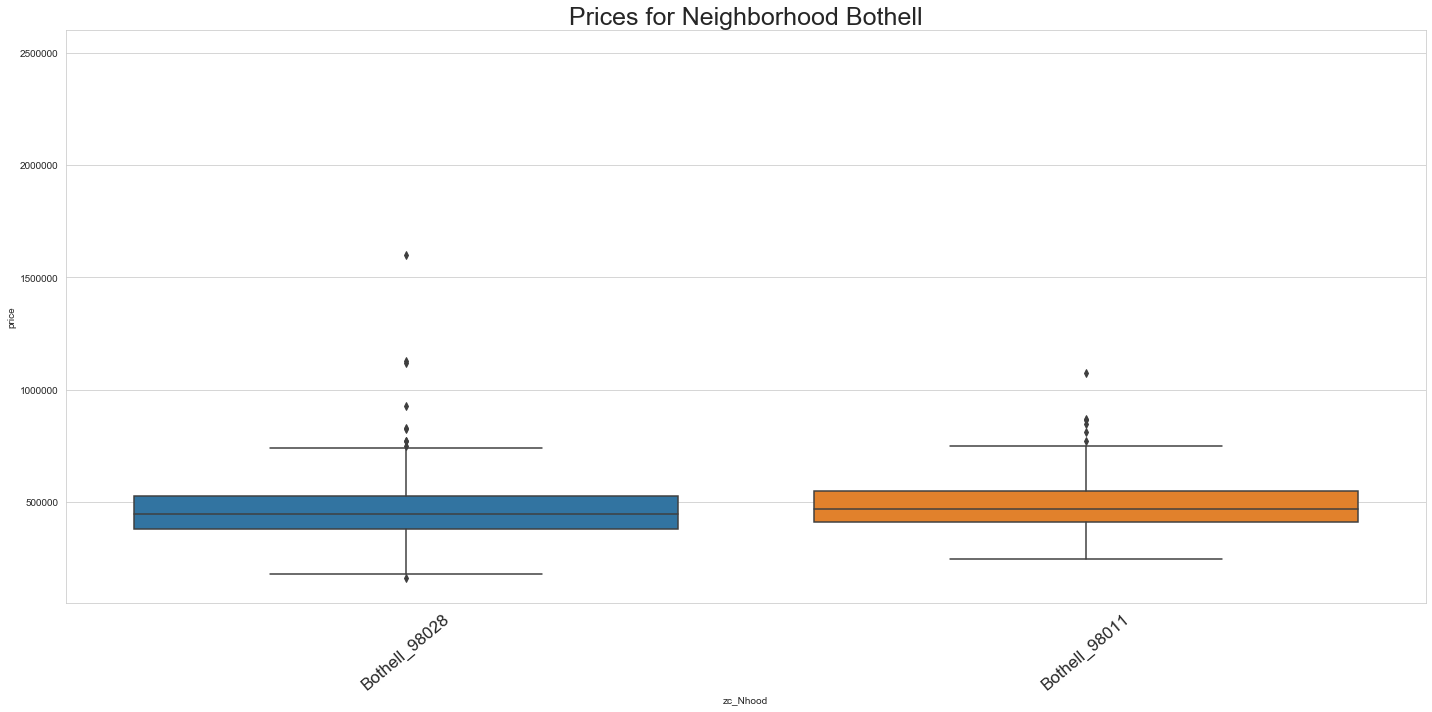

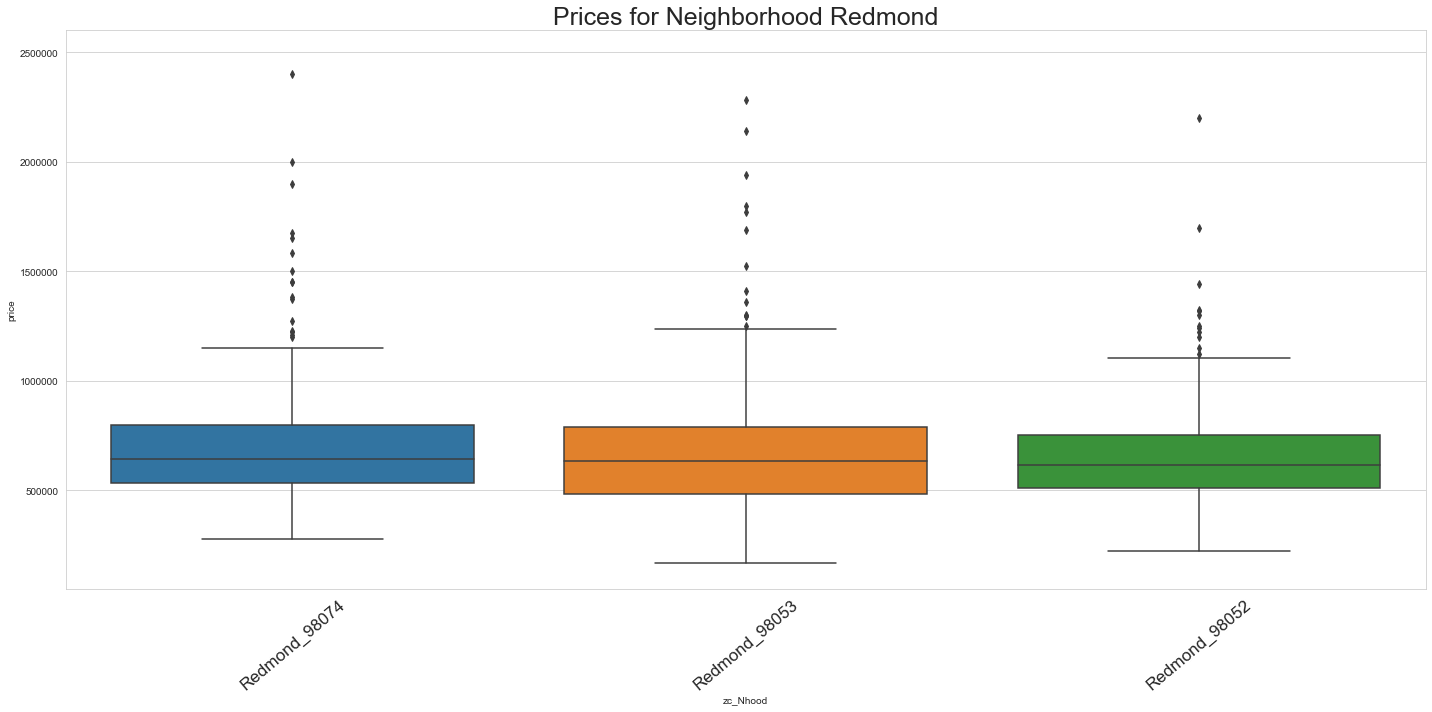

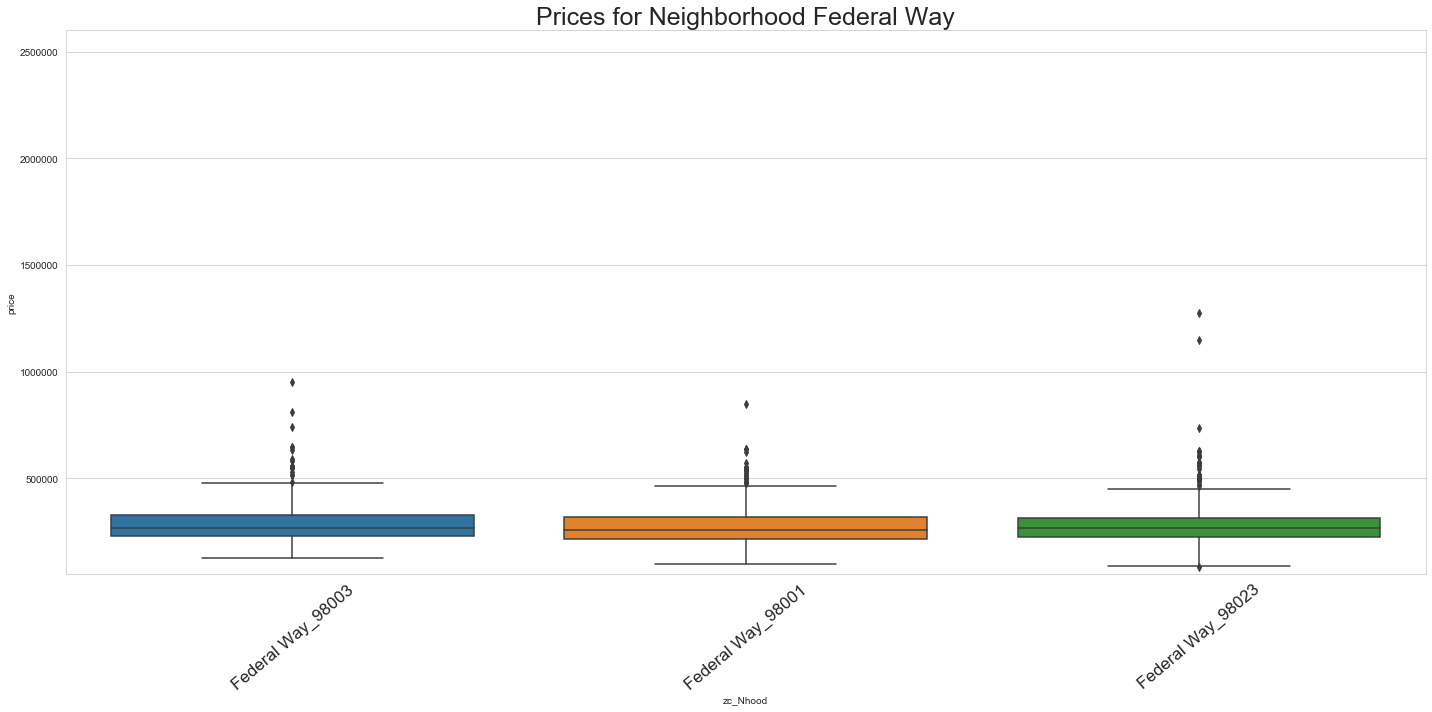

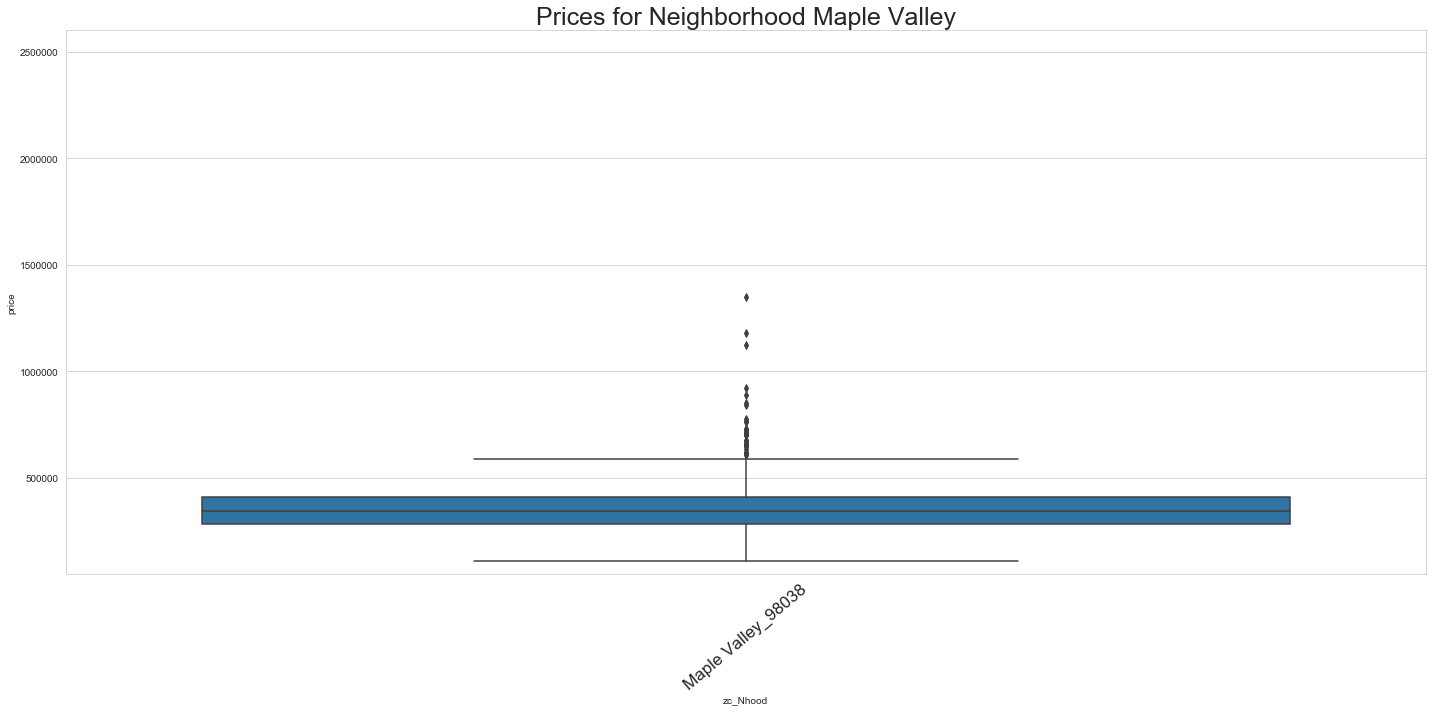

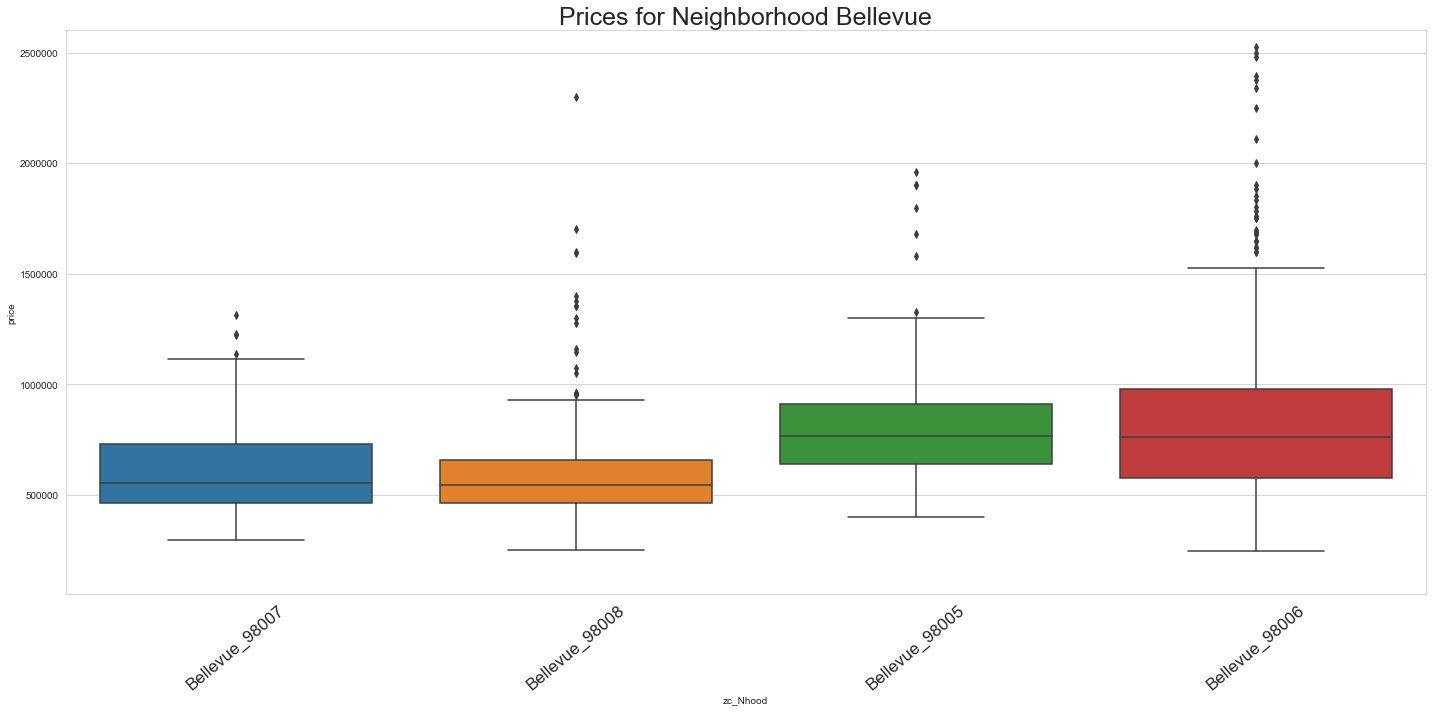

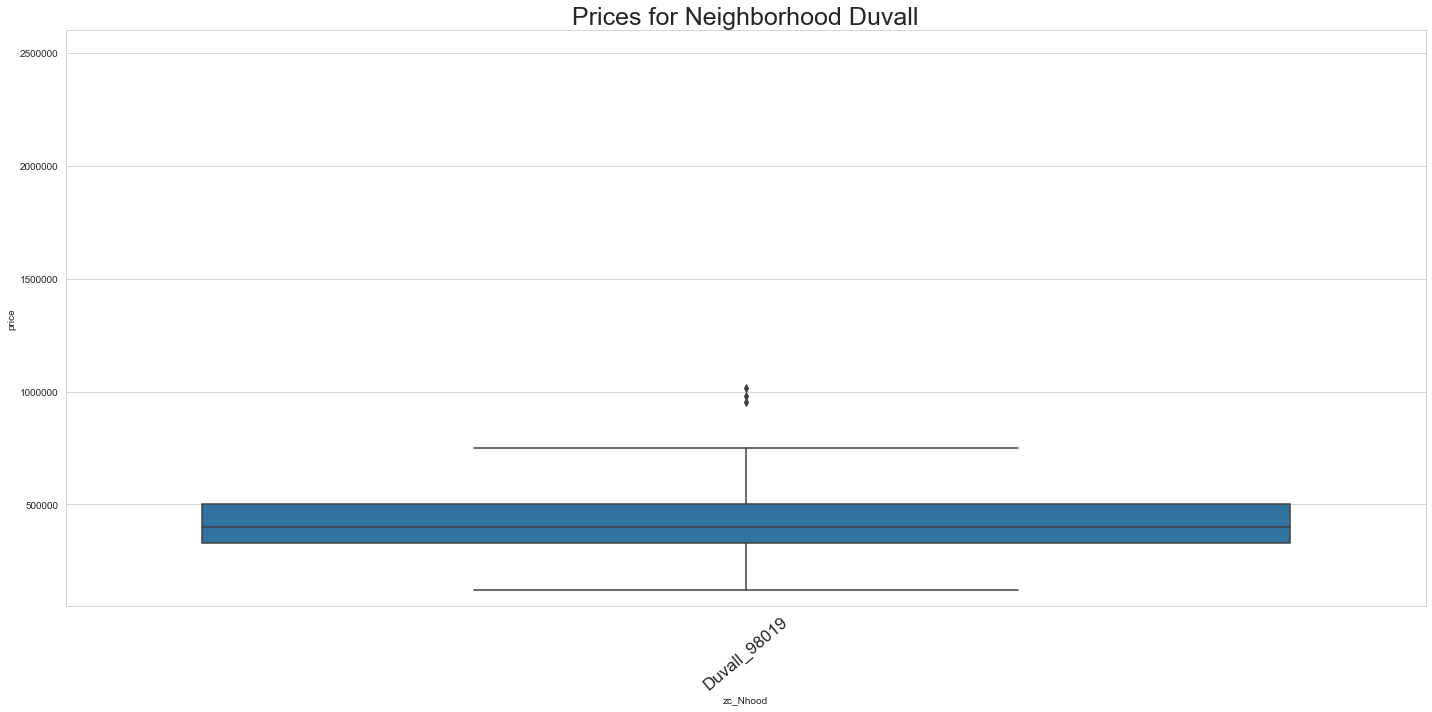

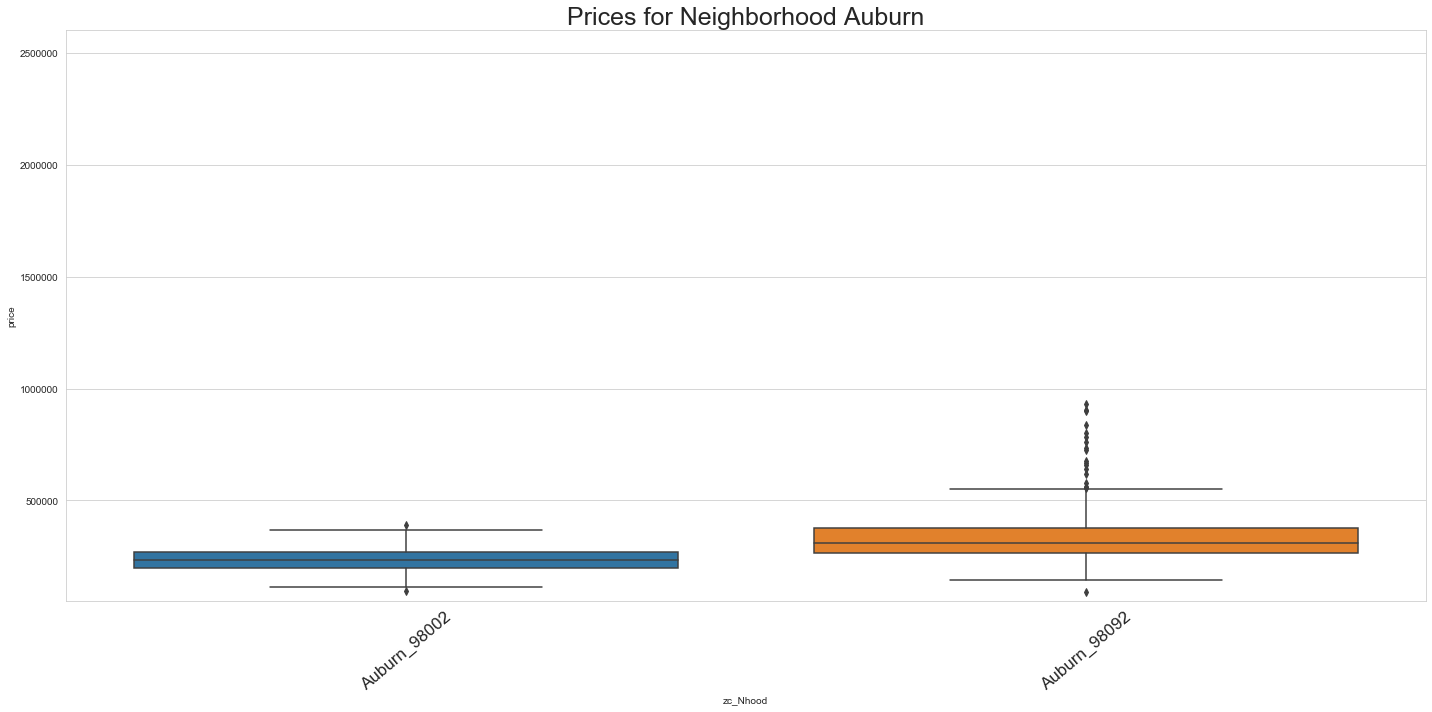

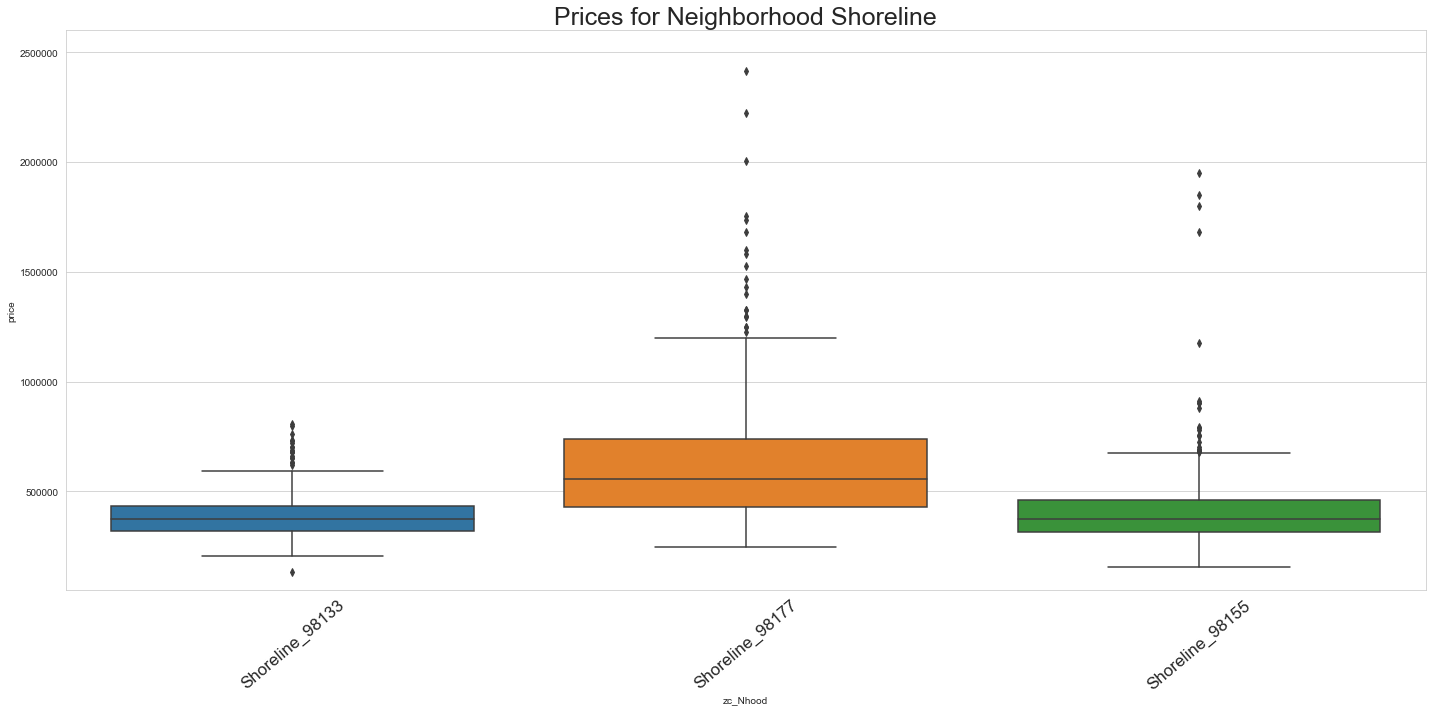

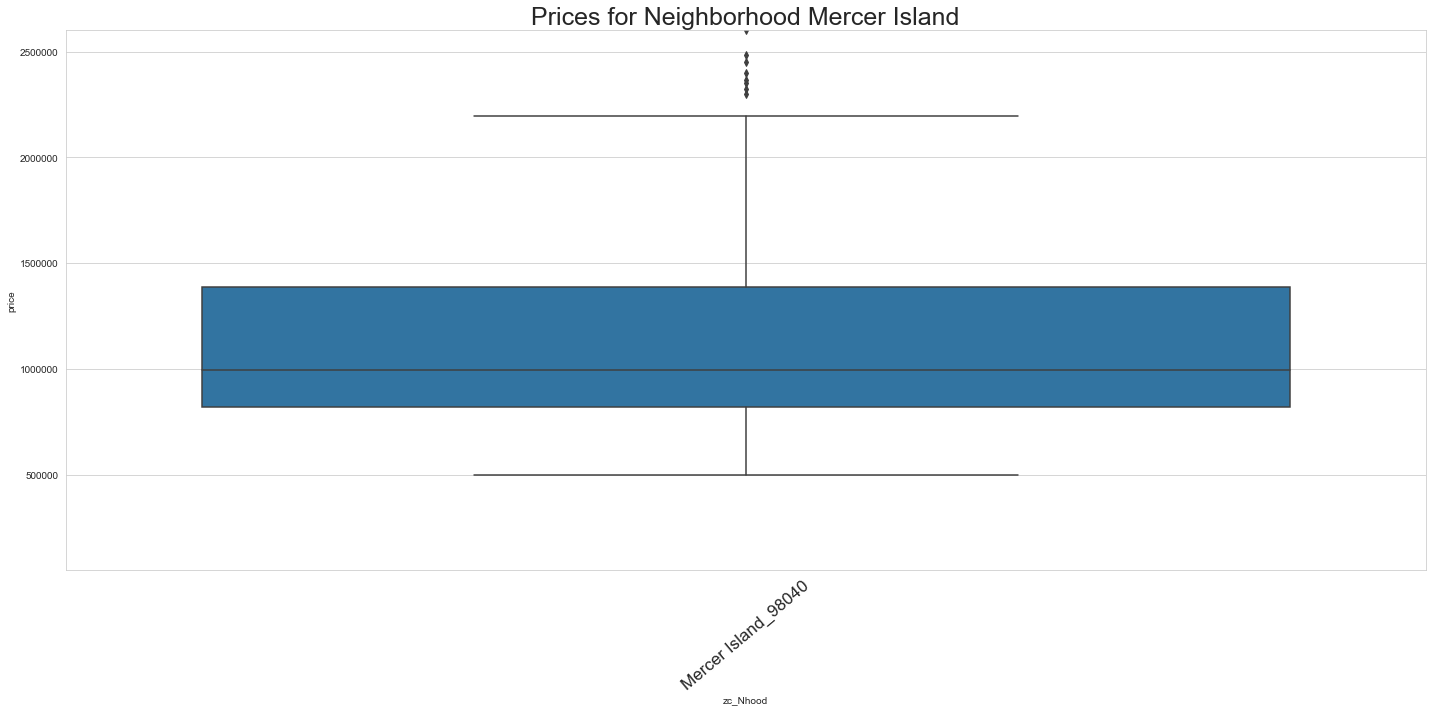

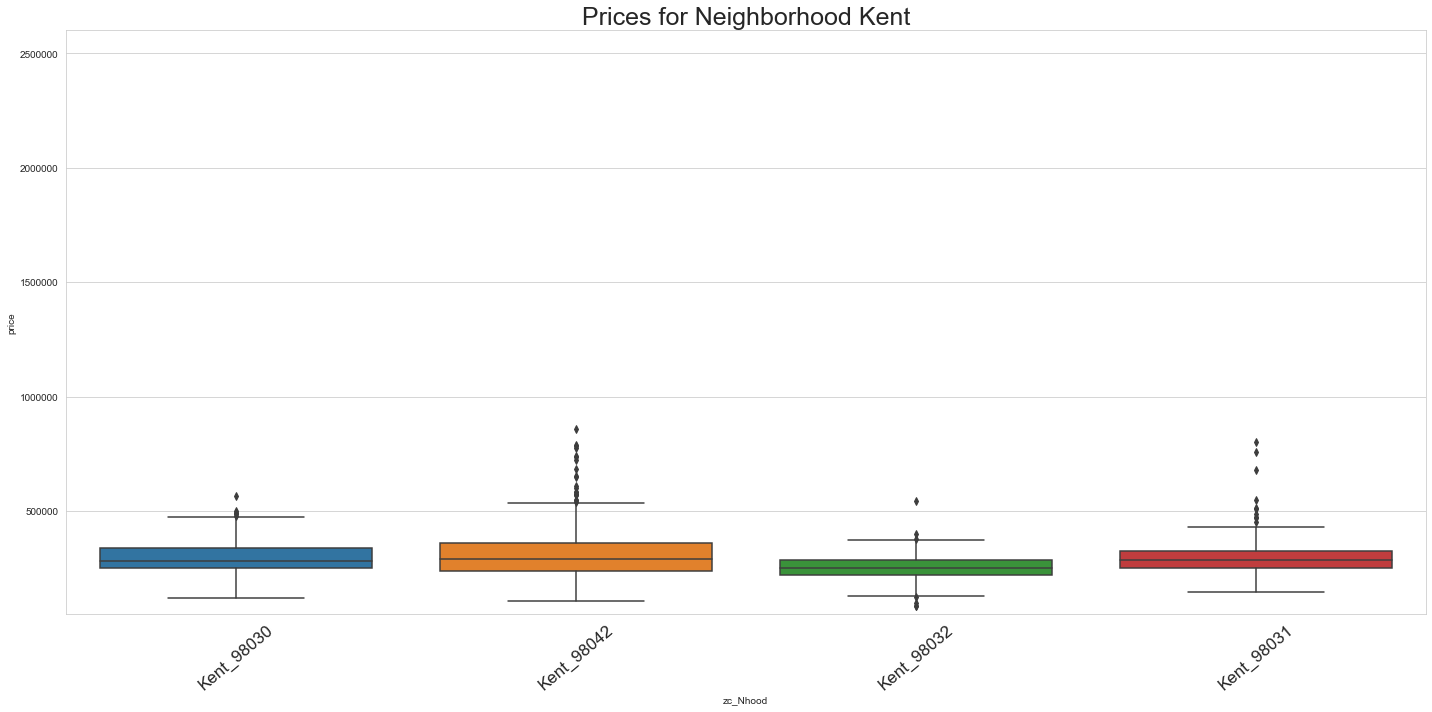

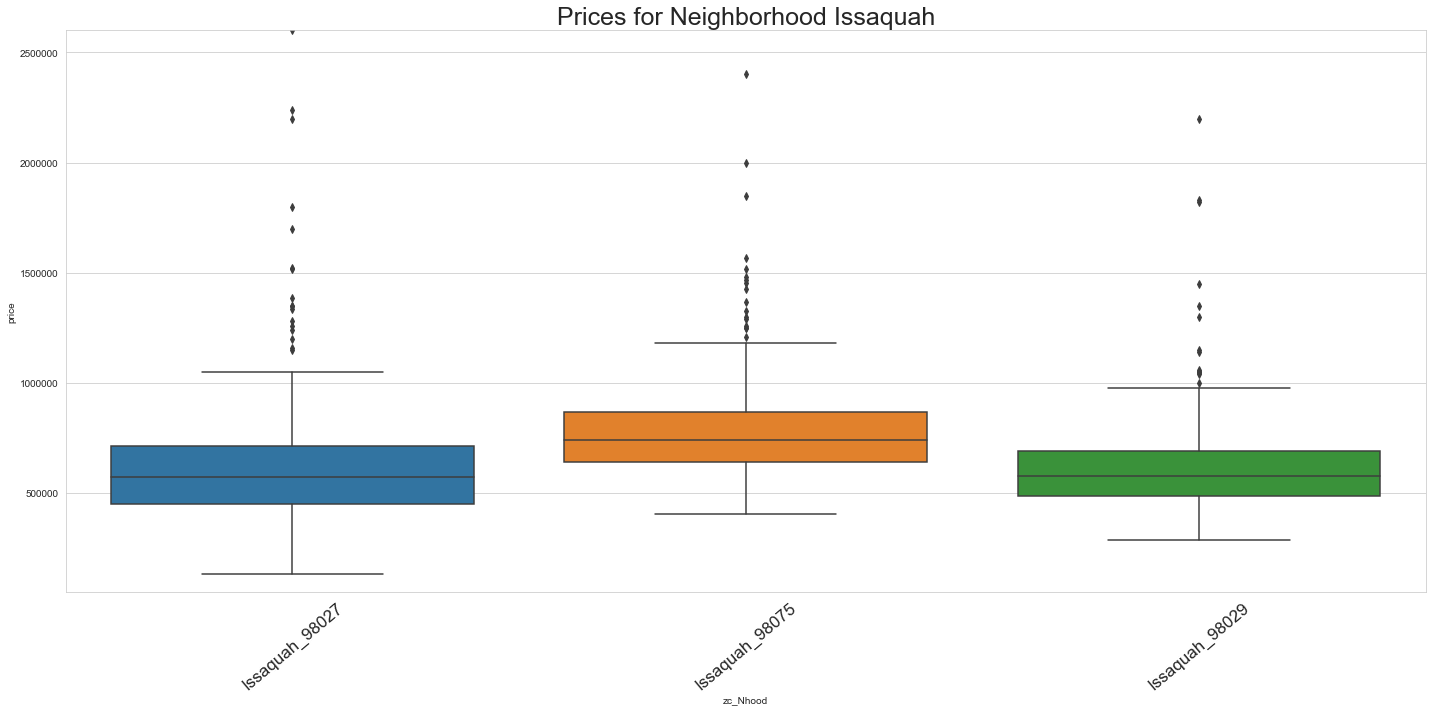

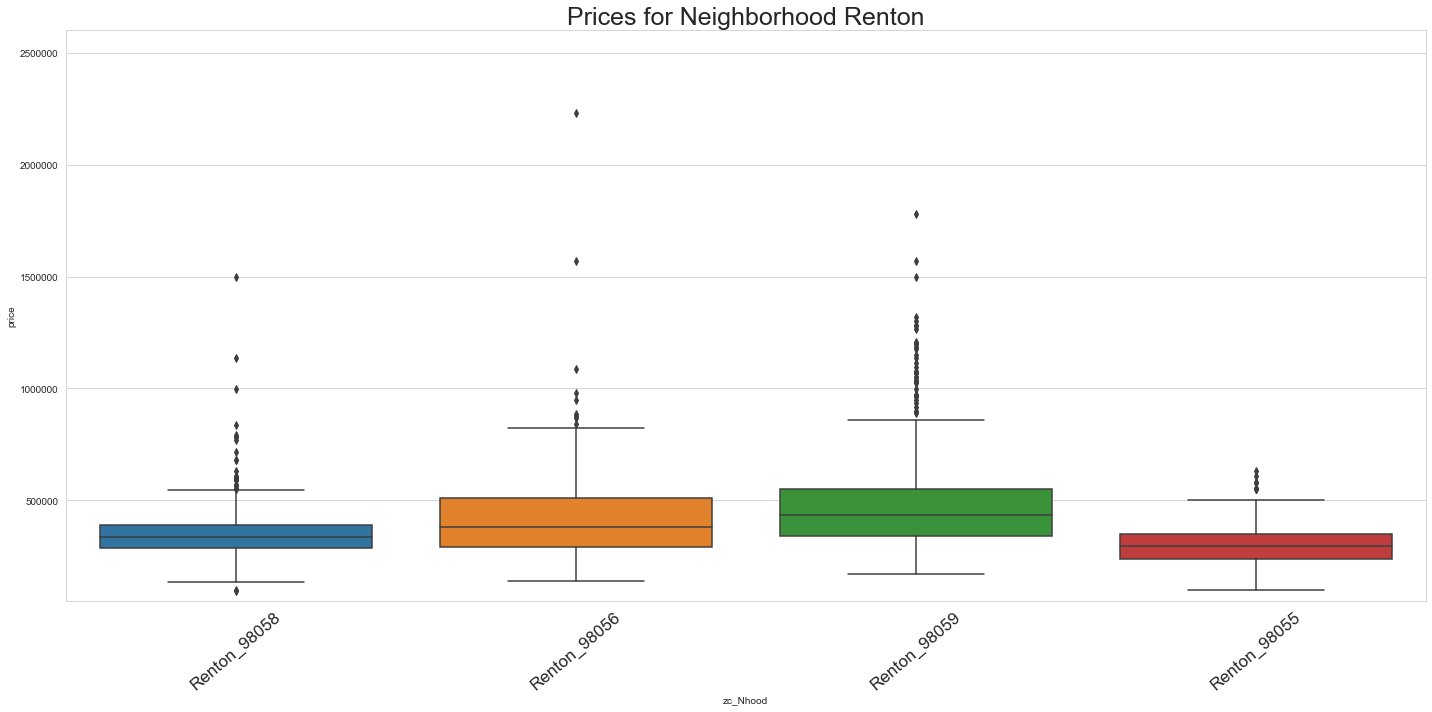

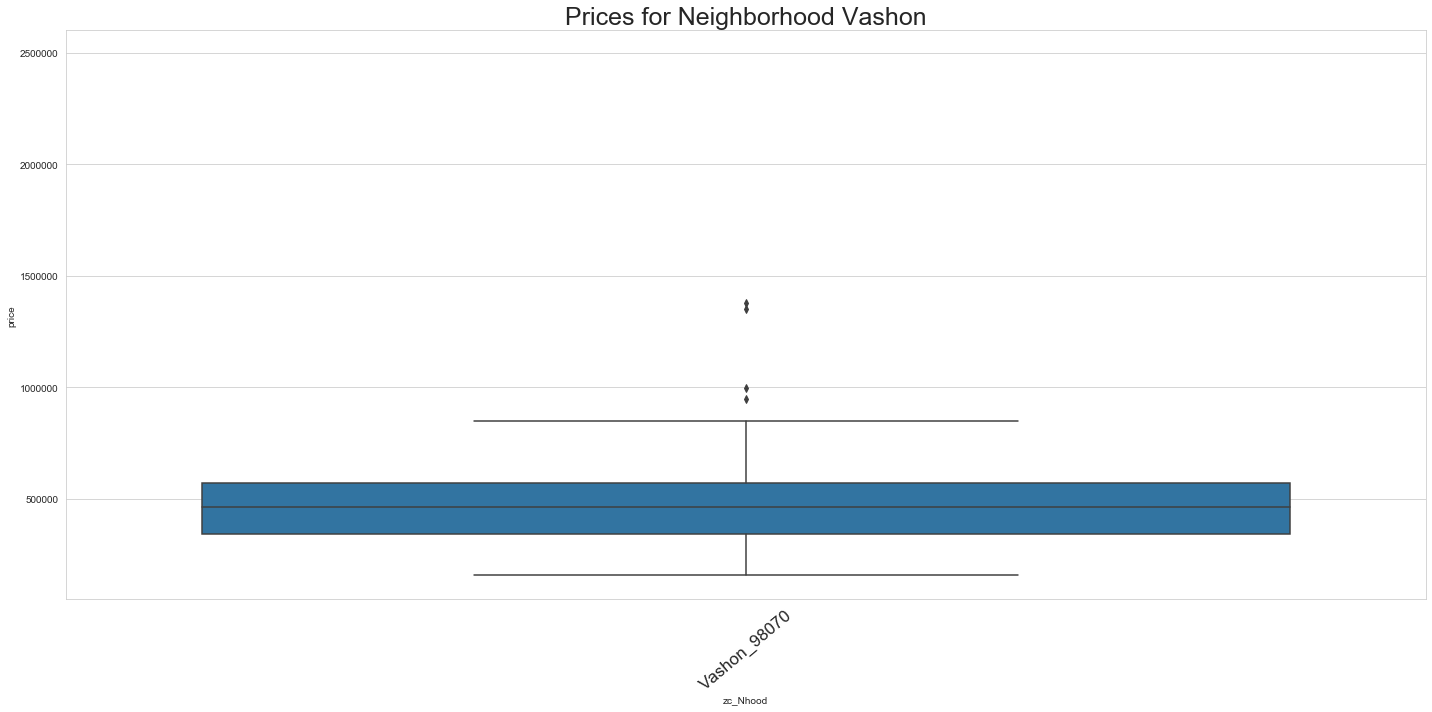

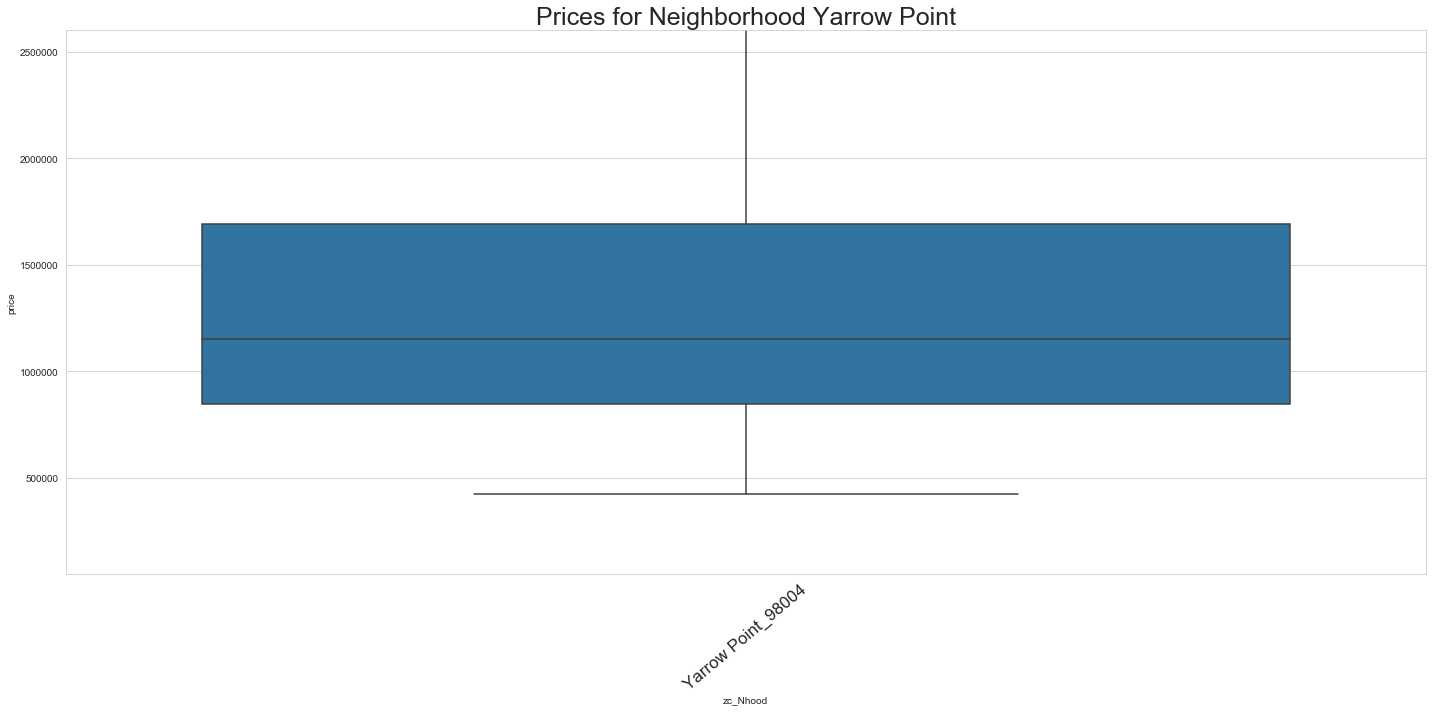

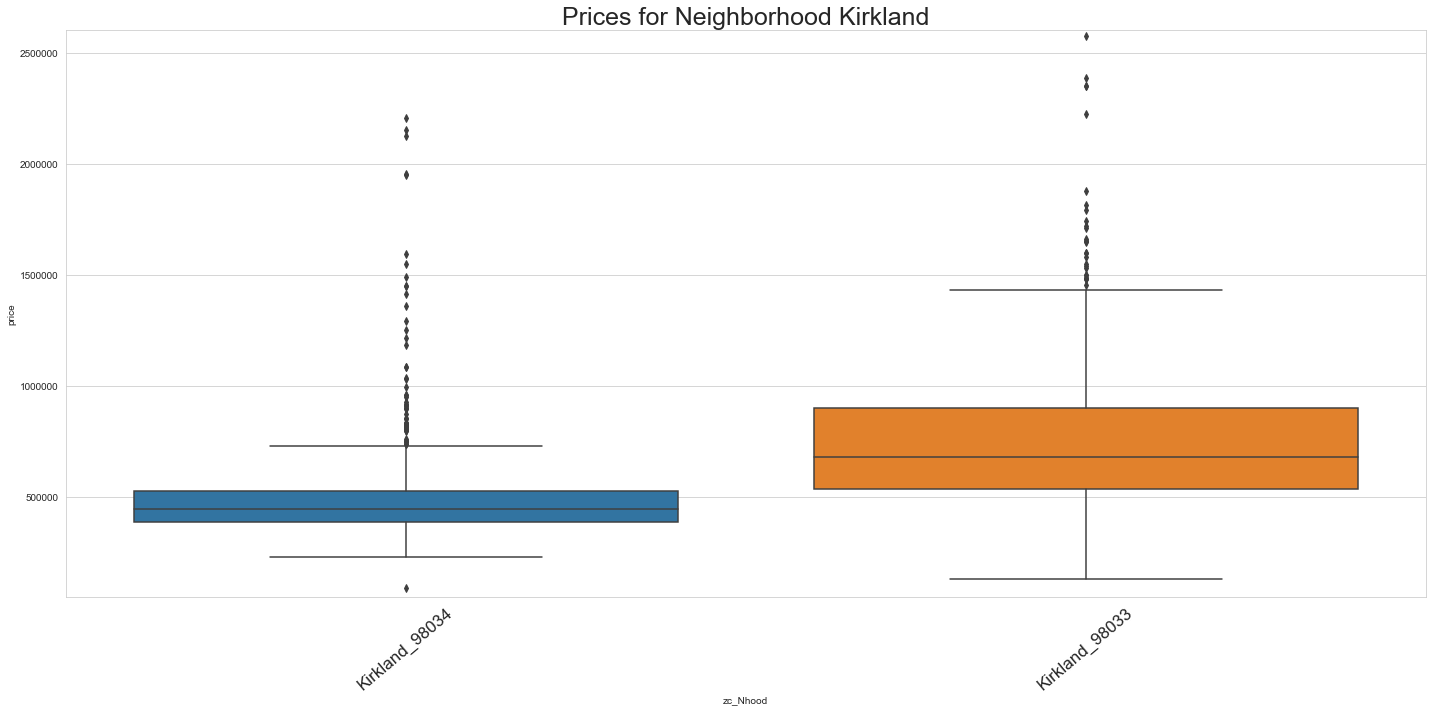

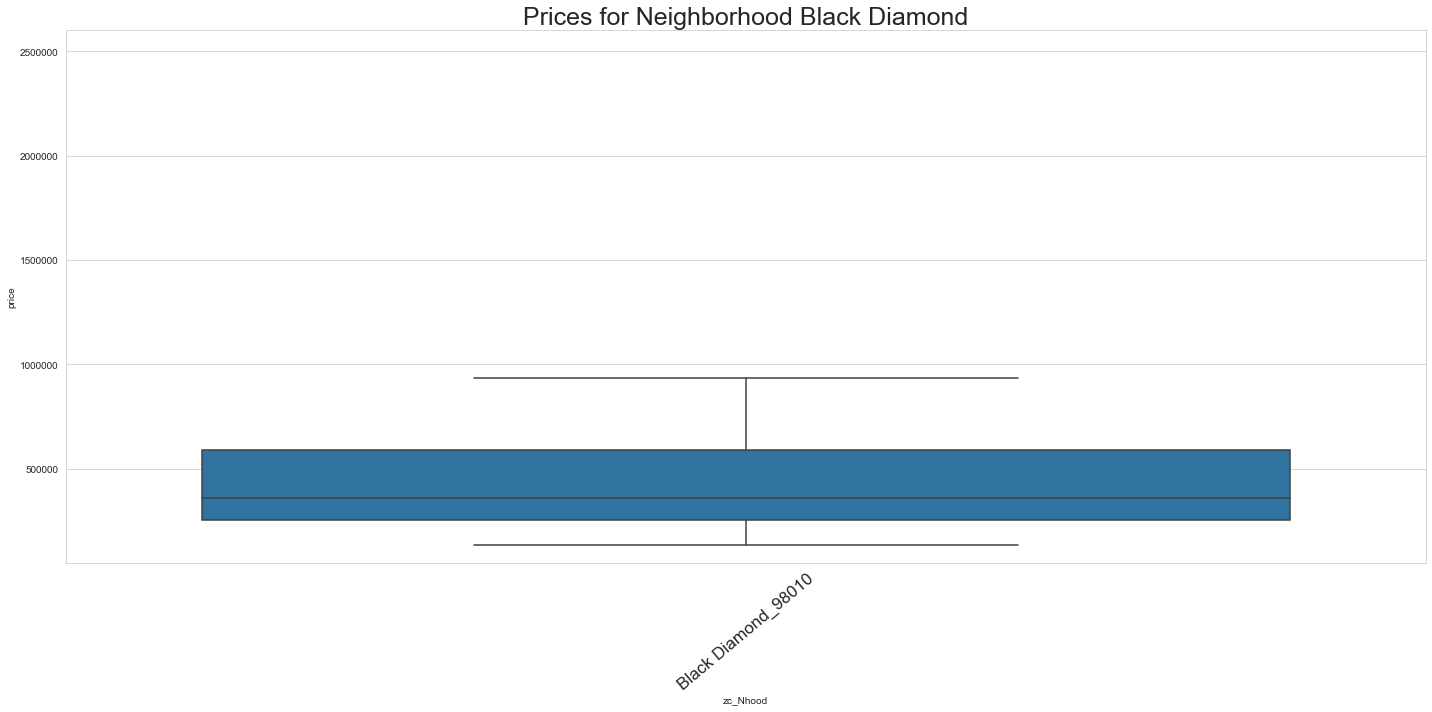

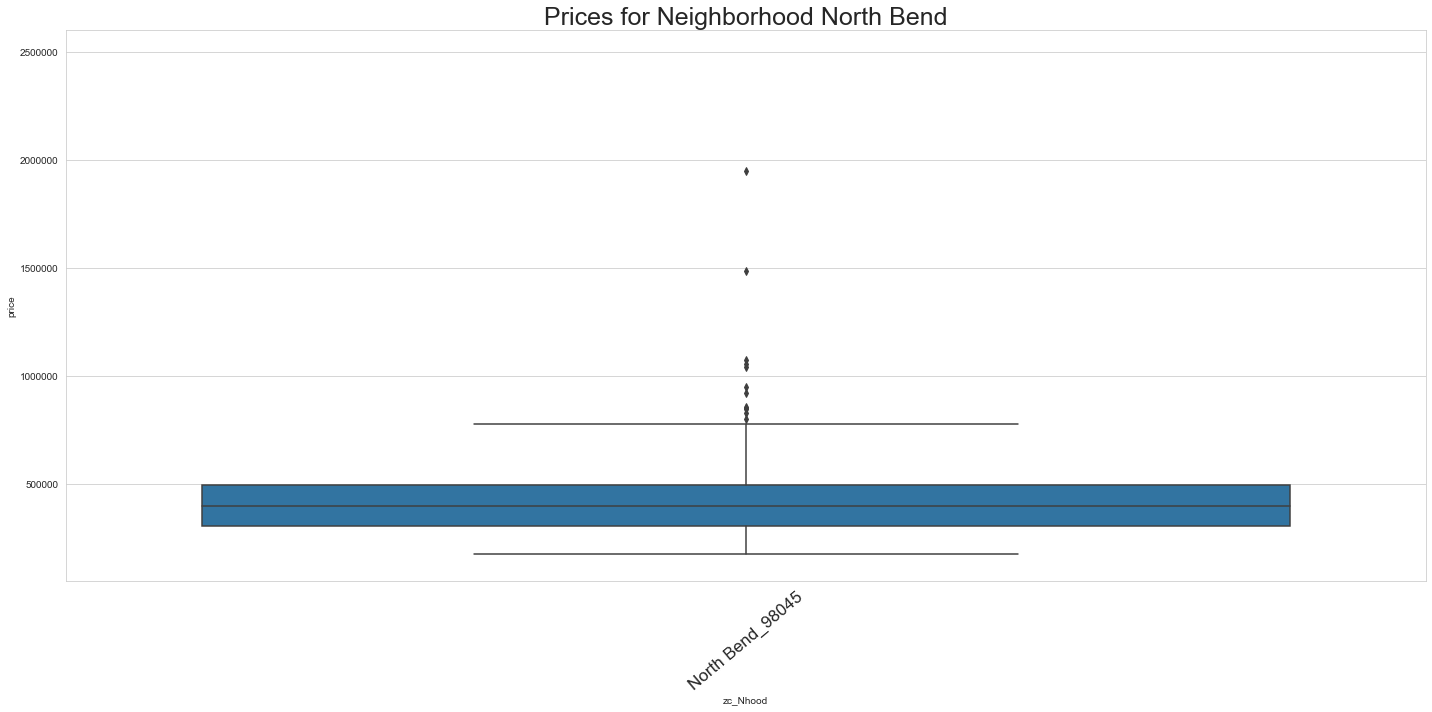

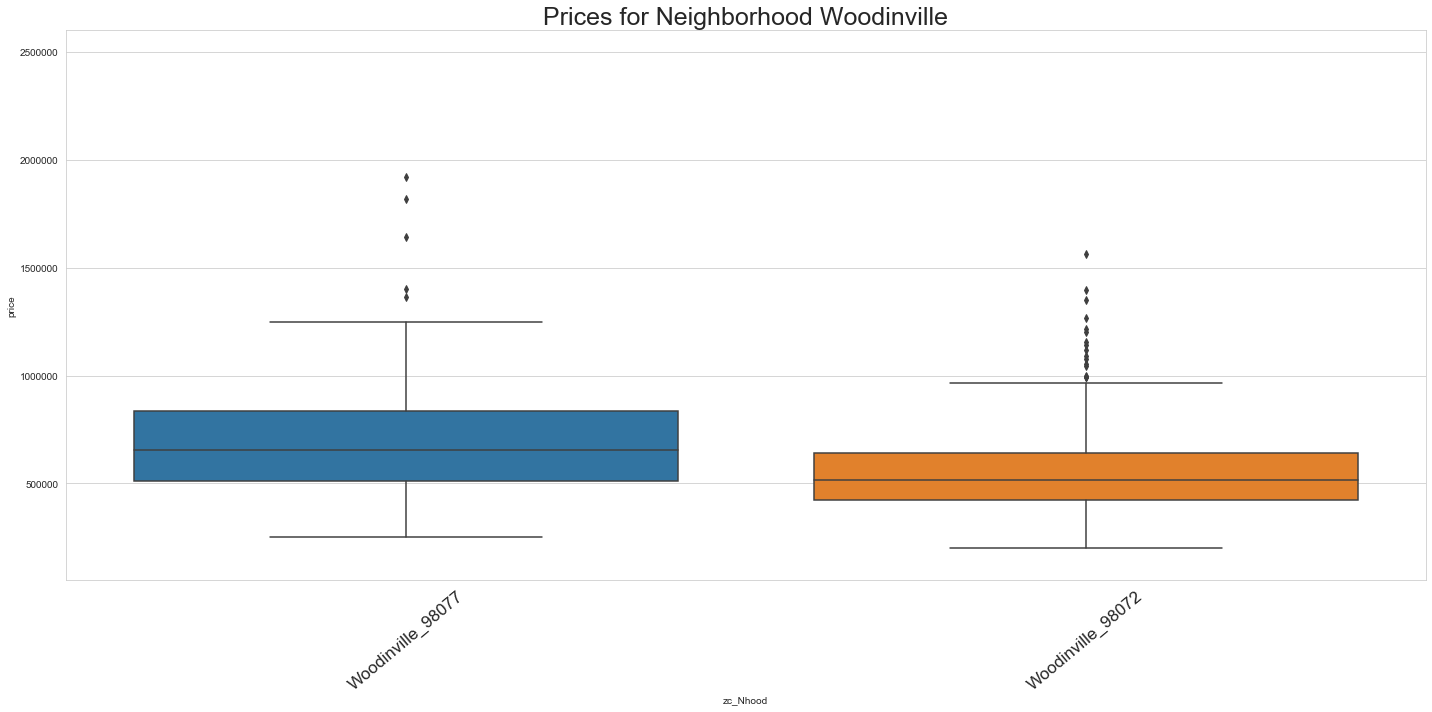

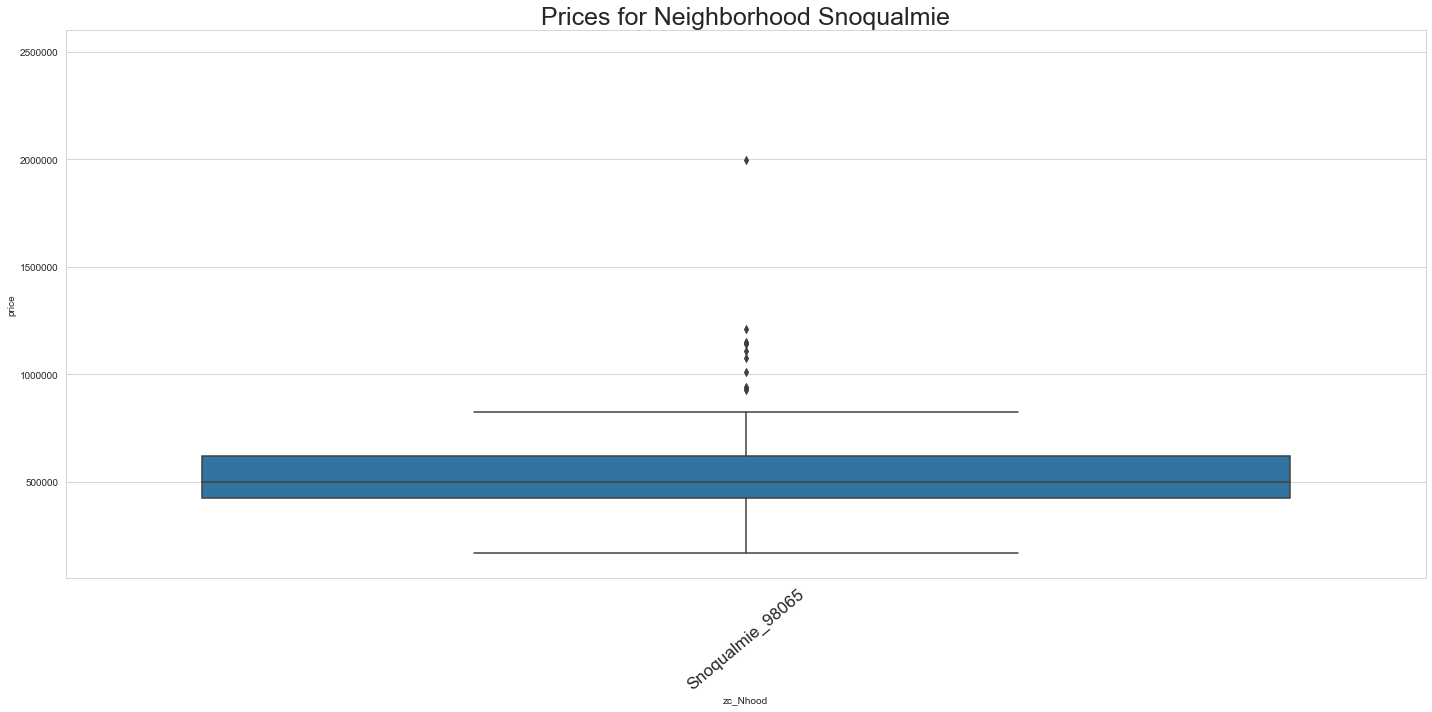

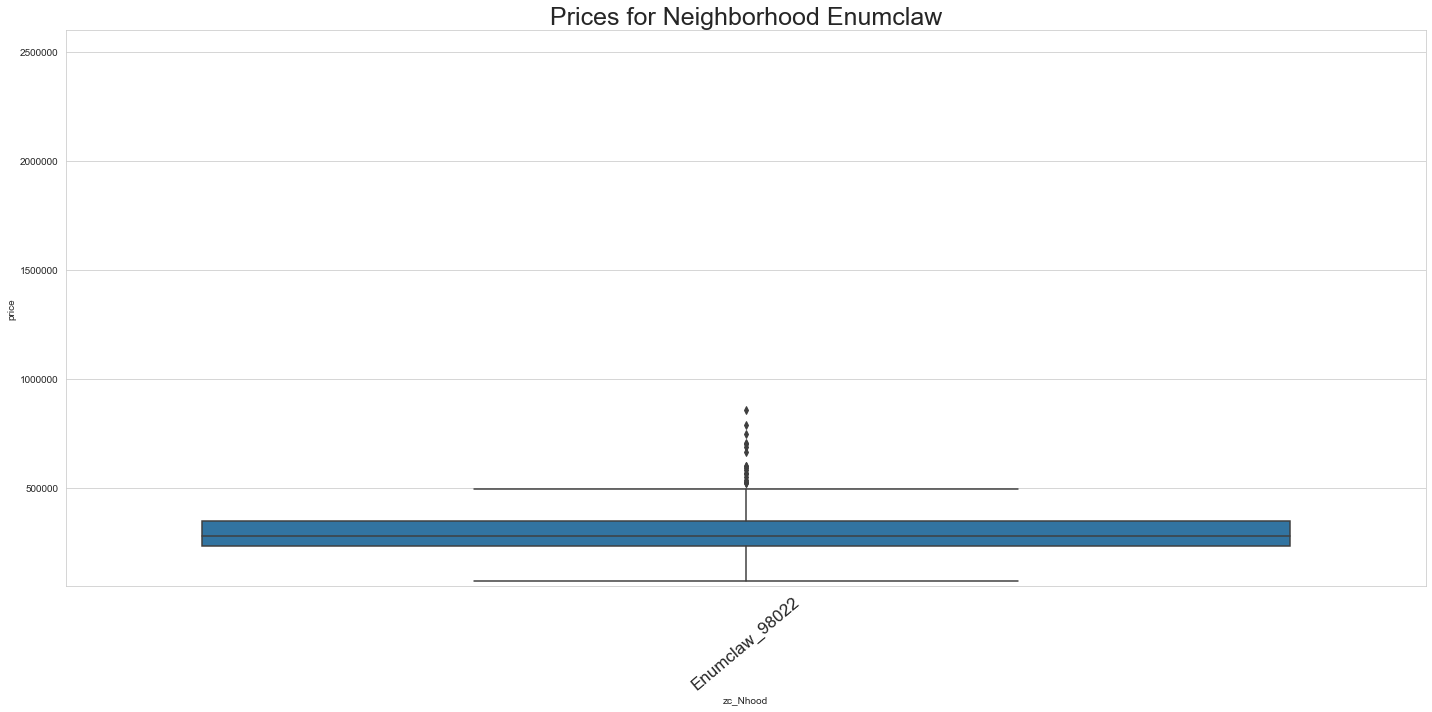

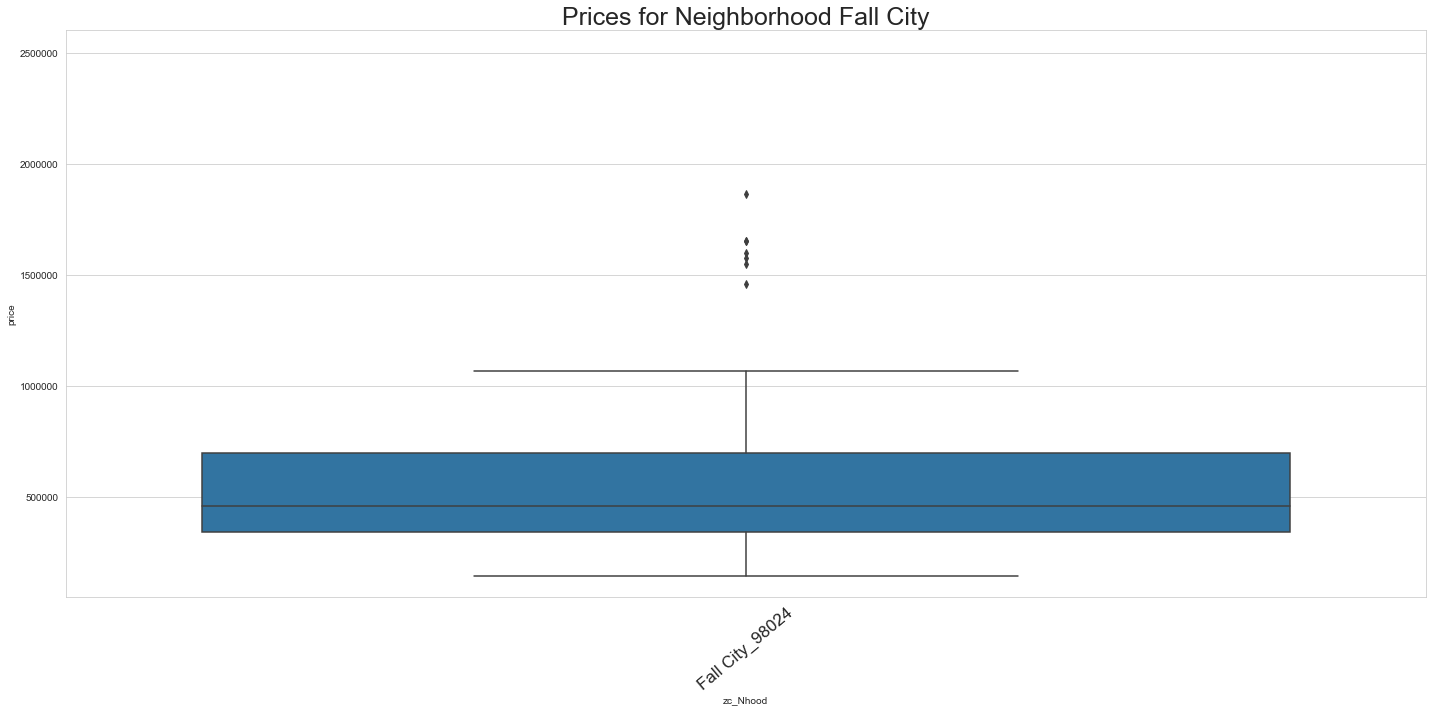

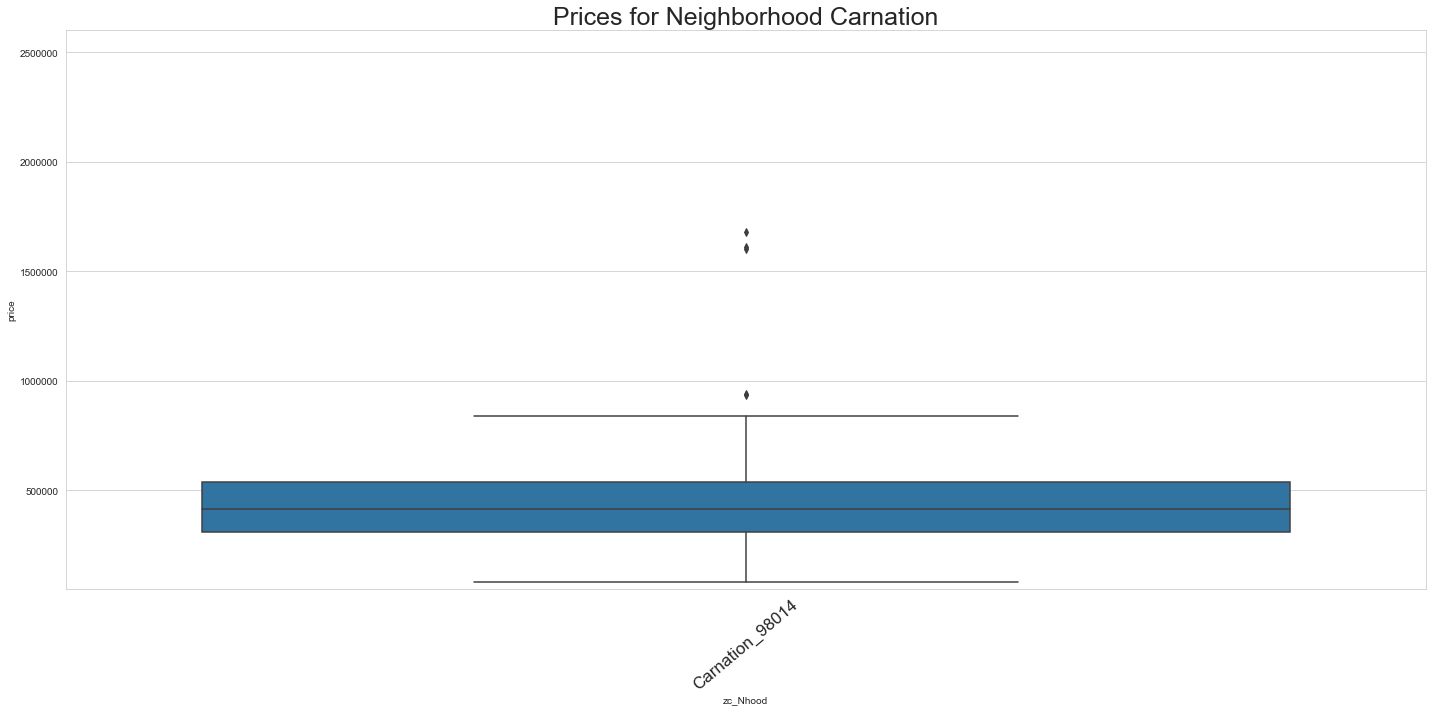

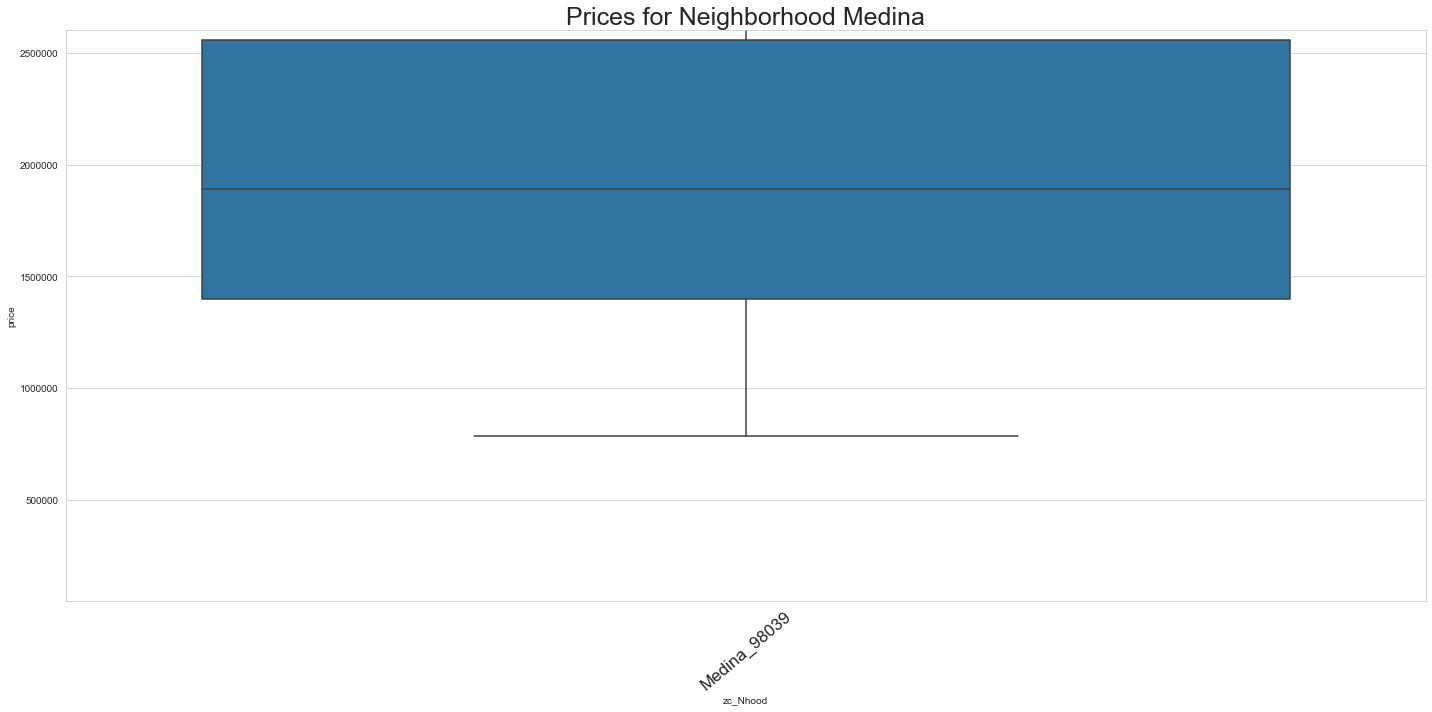

<Figure size 432x288 with 0 Axes>

In [59]:
for i in unique_Nhood:
    plt.figure(figsize = (20,10))
    sub_Nhood=df[df['Neigborhood']== i]
    ax=sns.boxplot(x='zc_Nhood', y='price', data=sub_Nhood, orient="v")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 17, rotation = 40)
    plt.ylim((50000,2600000))
    plt.title("Prices for Neighborhood " + str(i), fontsize= 25,rotation=0)
    plt.tight_layout()
    plt.show()
plt.savefig('Price witin Neihborhood.png', dpi=600)